<a href="https://colab.research.google.com/github/Elbx88/ML-Model-Perdiction/blob/main/Project_ML_Models_Erez_Levy_TMDB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ML Model Perdiction - Project By Erez Levy-Part II EDA- Exploratory Data Analysis (EDA)

# The TMDB Dataset

The TMDB (The Movie Database) is a widely-used resource for movie and TV show data, providing valuable information such as ratings, plot summaries, and more.

This dataset contains a collection of 150,000 tv shows from the TMDB database, collected and cleaned.

# The Project Overview:


This dataset opens up a wide range of possibilities for data analysts and data scientists. Here are some ideas to get you started:

Explore trends in TV show popularity based on vote count and average.
Analyze TV show genres to identify the most popular genres or combinations of genres.
Investigate the relationship between TV show ratings and the number of seasons and episodes.
Build a recommendation system that suggests TV shows based on a user's favorite genres or languages.
Predict the success of a TV show based on features like vote count, average, and popularity.
Identify the most prolific TV show creators or production companies based on the number of shows they have created.
Explore the distribution of TV show run times and investigate whether episode duration affects the overall ratings.
Investigate TV show production trends across different countries and networks.
Analyze the relationship between TV show language and popularity, and investigate the popularity of non-English shows.
Track the status of TV shows (in production or not) and analyze their popularity over time.
Develop a language analysis model to identify sentiment or themes from TV show overviews.

I need to build a predictive model to determine the success of a TV show based on features like vote count, vote average, and popularity. We'll approach this as a regression problem, where we predict a continuous success metric, and we'll use multiple regression models.



**Approach**
Feature Selection: Choose the features you want to use for prediction (vote_count, vote_average, popularity, and potentially others like number_of_episodes, number_of_seasons).

Target Variable: Define the target variable. In this case, we'll use popularity as a measure of success.

Data Splitting: Split the data into training and testing sets.

Model Selection: Try several regression models:
Linear Regression: A good starting point for regression problems.
Random Forest Regressor: A more complex model that can capture non-linear relationships.
Gradient Boosting Regressor: Another advanced model known for good performance.

Model Training: Train the models on the training set.

Model Evaluation: Evaluate the models on the testing set using appropriate metrics (e.g., R-squared, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE)).

Cross-Validation: Use Cross-Validation to ensure that the model does not overfit.

Hyperparameter Tuning: Use Hyperparameter Tuning to optimize the model parameters.

# Target Value prediction
Based on the potential insights and business value, I would suggest focusing on predicting either:

Popularity: It is a complex and dynamic metric that reflects overall success.
Vote Average (Rating): It captures audience satisfaction and critical acclaim.
Both of these targets have valuable real-world implications and can be approached with a variety of machine learning models.

Important Considerations:

Feature Engineering: Carefully select and engineer features from the TMDB data that you think will be most relevant to your chosen target variable.
Model Selection: Experiment with different machine learning models (regression for popularity or ratings, classification for status/renewal) to find the best performer.
Evaluation: Use appropriate metrics (like RMSE for regression or accuracy for classification) to assess the performance of your predictive model.

# Import the pickel file tmdb.NP from my Google Drive location

In [1]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_NP.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_NP = pickle.load(file)
    print(f"tmdb_NP loaded from {file_path} successfully.")

    # You can now use the loaded DataFrame (tmdb_NP)
    # For example, you can display the first few rows:
    print(tmdb_NP.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Mounted at /content/drive
tmdb_NP loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_NP.pkl successfully.
              name      id  number_of_seasons  number_of_episodes  vote_count  \
0          minutes   39280                  0                   0           0   
1              man  222976                  1                   5           3   
2   erne tur retur  231560                  1                  10           0   
3                    34835                  1                  12          10   
4             bama   42598                  0                   0           0   

   vote_average  adult first_air_date last_air_date  popularity      type  \
0           0.0  False           None          None       0.600  Scripted   
1           7.7  False     2023-05-28    2023-06-25       4.606  Scripted   
2           0.0  False     2014-05-15    2014-07-17       0.600  Scripted   
3           6.4  False     2006-10-06    2006-12-22       9.761  Scripted  

# 2. Exploratory Data Analysis (EDA)


# Instant Reports:
 Generate initial reports to get a quick overview of the dataset, including summary statistics and distributions.


--- Summary Statistics ---
         name             id  number_of_seasons  number_of_episodes  \
count   82872   82872.000000       82872.000000        82872.000000   
unique  82429            NaN                NaN                 NaN   
top                      NaN                NaN                 NaN   
freq       72            NaN                NaN                 NaN   
mean      NaN   78849.088920           1.221426           22.332983   
std       NaN   65504.039077           1.883718           86.343898   
min       NaN       1.000000           0.000000            0.000000   
25%       NaN   28477.750000           1.000000            1.000000   
50%       NaN   58982.500000           1.000000            6.000000   
75%       NaN  109999.500000           1.000000           20.000000   
max       NaN  251199.000000         101.000000        10456.000000   

          vote_count  vote_average  adult first_air_date last_air_date  \
count   82872.000000  82872.000000  82872    

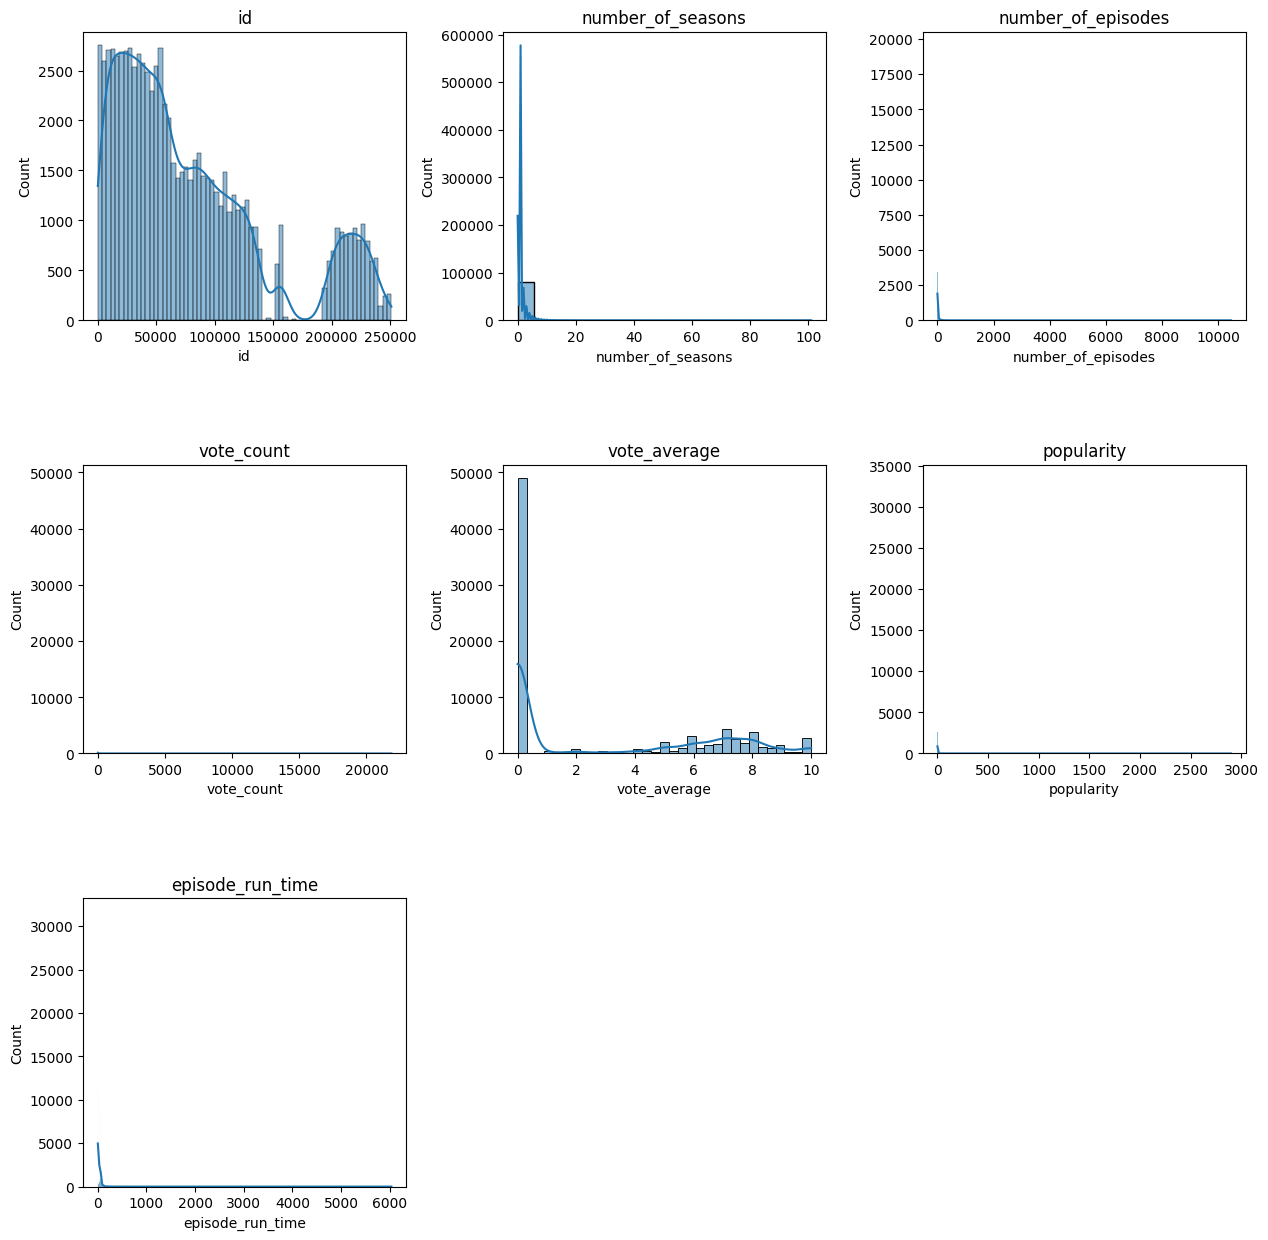

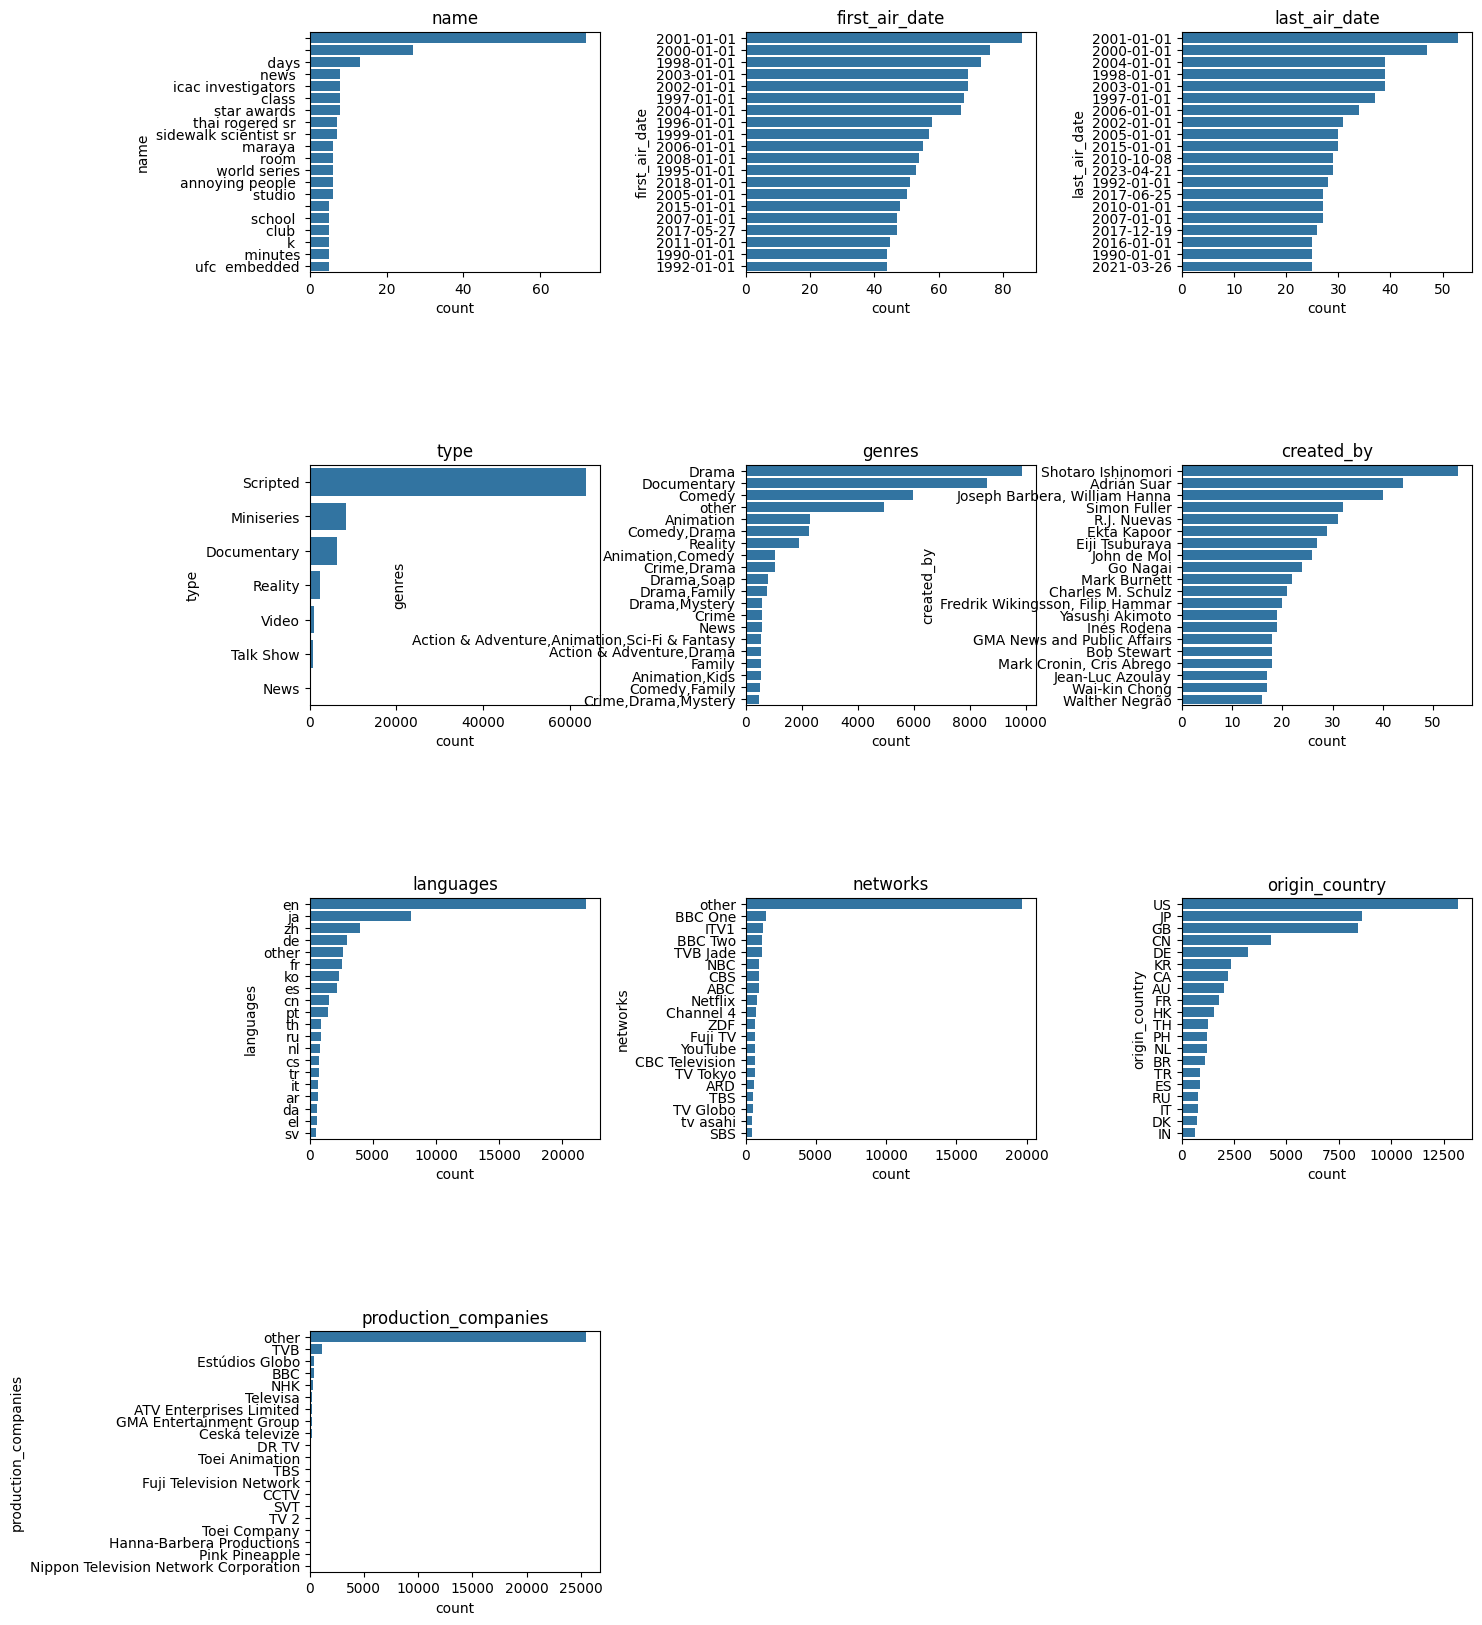

In [2]:
# Transfer tmdb_NP to tmdb_eda
tmdb_eda = tmdb_NP.copy()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def generate_initial_report(df):
    """Generates an initial report with summary statistics and distributions."""

    # --- Summary Statistics ---
    summary_stats = df.describe(include='all')  # Include all columns for a comprehensive overview
    print("\n--- Summary Statistics ---")
    print(summary_stats)

    # --- Distributions ---
    numerical_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Histograms for Numerical Features
    num_plots = len(numerical_cols)
    num_rows = (num_plots + 2) // 3  # Calculate rows for subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Create subplots
    fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing

    for i, col in enumerate(numerical_cols):
        row = i // 3  # Calculate subplot row index
        col_index = i % 3  # Calculate subplot column index
        ax = axes[row, col_index]  # Get the current subplot axes

        sns.histplot(df[col], kde=True, ax=ax)  # Plot on the current axes
        ax.set_title(col)

    # Remove empty subplots if any
    if num_plots < num_rows * 3:
        for i in range(num_plots, num_rows * 3):
            fig.delaxes(axes.flatten()[i])

    plt.show()

    # Bar Plots for Categorical Features
    num_plots = len(categorical_cols)
    num_rows = (num_plots + 2) // 3  # Calculate rows for subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    fig.subplots_adjust(hspace=0.8, wspace=0.5)

    for i, col in enumerate(categorical_cols):
        row = i // 3  # Calculate subplot row index
        col_index = i % 3  # Calculate subplot column index
        ax = axes[row, col_index]

        sns.countplot(y=df[col], order=df[col].value_counts().index[:20], ax=ax)  # Limit to top 20 categories
        ax.set_title(col)

    # Remove empty subplots if any
    if num_plots < num_rows * 3:
        for i in range(num_plots, num_rows * 3):
            fig.delaxes(axes.flatten()[i])

    plt.show()


# --- Main execution ---
if __name__ == "__main__":
    generate_initial_report(tmdb_eda)

# DATA PROTOCOL

 A data protocol is essentially a set of rules and conventions that govern how data is structured, transmitted, and interpreted between different systems or applications. These protocols ensure that data is exchanged in a consistent and understandable manner, even across diverse platforms and technologies. They are fundamental to enabling communication and interoperability in the digital world.

In [3]:
import pandas as pd

# Type of data
tmdb_eda.dtypes.to_excel("tmdb_eda_datatype.xlsx", sheet_name='data_types')

# Maximum points
# Create a DataFrame for the max values to use to_excel

for col in tmdb_eda.select_dtypes(include=['number']):
    # Create a DataFrame for the max value to use to_excel
    pd.DataFrame({col: [tmdb_eda[col].max()]}).to_excel(f"tmdb_eda_max_{col}.xlsx", sheet_name='max', index=False)

# Minimum points
# Create a DataFrame for the min values to use to_excel

pd.DataFrame(tmdb_eda.select_dtypes(include=['number']).min()).T.to_excel("tmdb_eda_min.xlsx", sheet_name='min', header=False)

# Isnull values
tmdb_eda.isnull().to_excel("tmdb_eda_isnull.xlsx", sheet_name='isnull')

# Unique values
tmdb_eda.nunique().to_excel("tmdb_eda_nunique.xlsx", sheet_name='nunique')

# Descriptive Analysis:
 Use statistical methods and visualizations to understand the data, identify patterns, trends, and potential issues.

count    82872.000000
mean         5.989490
std         30.178142
min          0.000000
25%          0.600000
50%          0.990000
75%          2.996000
max       2898.984000
Name: popularity, dtype: float64


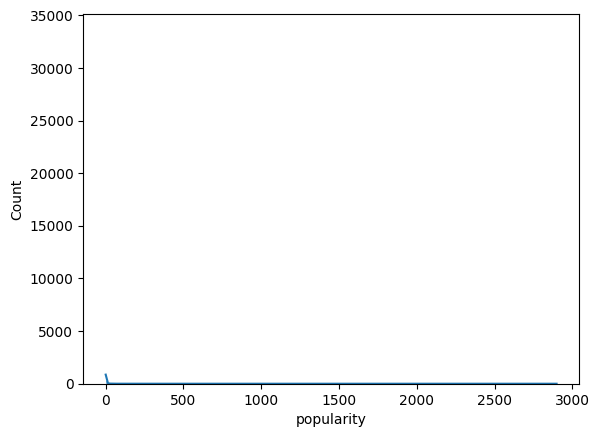

genres
Drama                                                   9877
Documentary                                             8605
Comedy                                                  5974
other                                                   4939
Animation                                               2289
Comedy,Drama                                            2272
Reality                                                 1908
Animation,Comedy                                        1066
Crime,Drama                                             1064
Drama,Soap                                               814
Drama,Family                                             778
Drama,Mystery                                            593
Crime                                                    578
News                                                     574
Action & Adventure,Animation,Sci-Fi & Fantasy            567
Action & Adventure,Drama                                 557
Family           

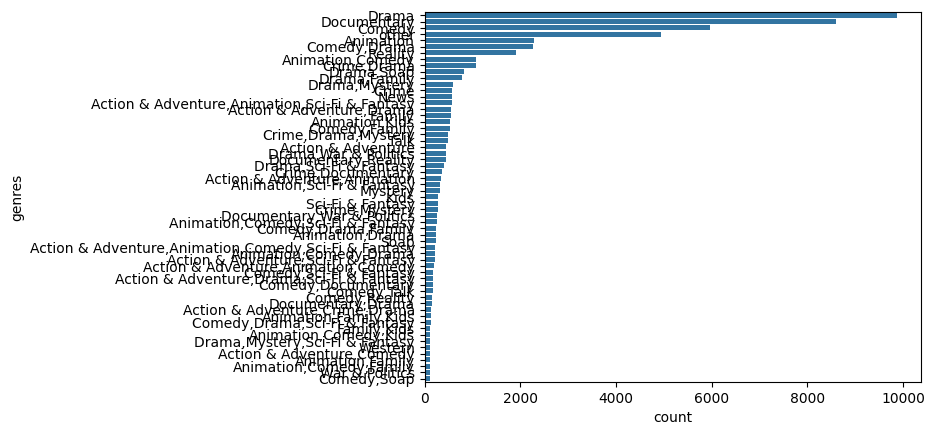

              popularity  vote_average
popularity      1.000000      0.168937
vote_average    0.168937      1.000000


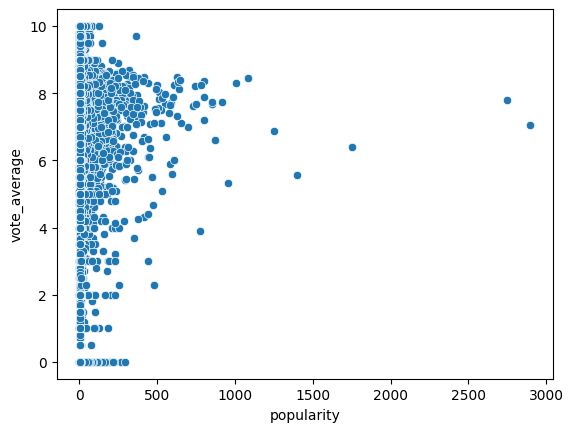

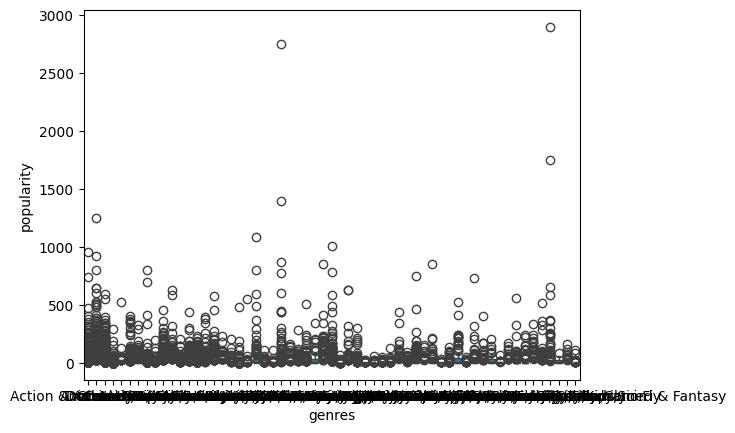

origin_country                                      AE  AE, BH, KW, SA  \
genres                                                                   
Action & Adventure                                   0               0   
Action & Adventure,Animation                         1               0   
Action & Adventure,Animation,Comedy                  0               0   
Action & Adventure,Animation,Comedy,Sci-Fi & Fa...   0               0   
Action & Adventure,Animation,Sci-Fi & Fantasy        0               0   
Action & Adventure,Comedy                            0               0   
Action & Adventure,Crime,Drama                       0               0   
Action & Adventure,Drama                             1               0   
Action & Adventure,Drama,Sci-Fi & Fantasy            0               0   
Action & Adventure,Sci-Fi & Fantasy                  0               0   
Animation                                            1               0   
Animation,Comedy                      

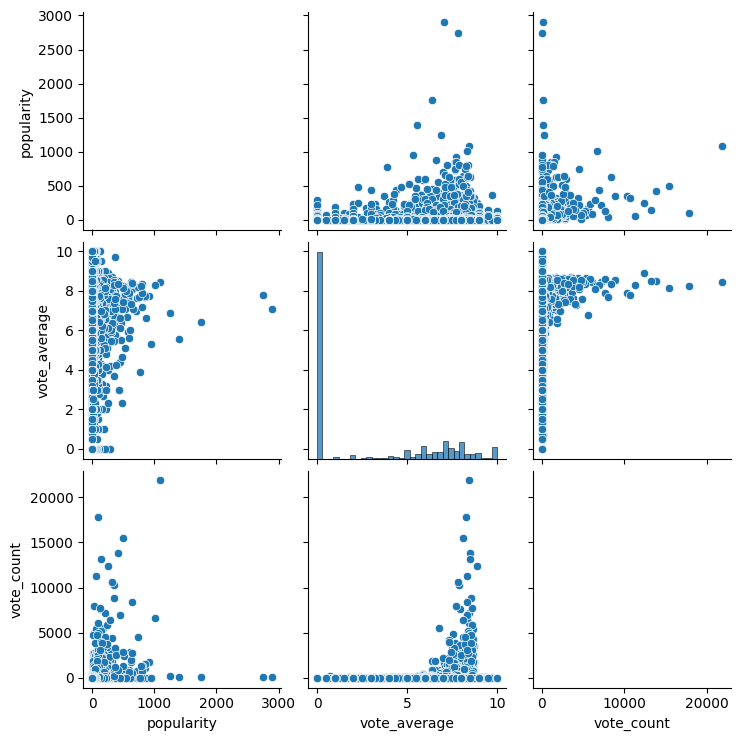

                  popularity  vote_average  vote_count  episode_run_time
popularity          1.000000      0.168937    0.326491          0.023794
vote_average        0.168937      1.000000    0.111484          0.126293
vote_count          0.326491      0.111484    1.000000          0.011530
episode_run_time    0.023794      0.126293    0.011530          1.000000


In [4]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


# The tmdb_eda is my DataFrame

# 1. Univariate Analysis:
# Numerical Feature (e.g., popularity)

print(tmdb_eda['popularity'].describe())  # Summary statistics
sns.histplot(tmdb_eda['popularity'], kde=True)  # Histogram
plt.show()

# Categorical Feature (e.g., genres)
print(tmdb_eda['genres'].value_counts())  # Frequency table
sns.countplot(y=tmdb_eda['genres'], order=tmdb_eda['genres'].value_counts().index)  # Bar plot
plt.show()

# 2. Bivariate Analysis:
# Numerical vs. Numerical (e.g., popularity vs. vote_average)

print(tmdb_eda[['popularity', 'vote_average']].corr())  # Correlation
sns.scatterplot(x='popularity', y='vote_average', data=tmdb_eda)  # Scatter plot
plt.show()

# Numerical vs. Categorical (e.g., popularity by genre)

sns.boxplot(x='genres', y='popularity', data=tmdb_eda)  # Box plot
plt.show()

# Categorical vs. Categorical (e.g., genres vs. origin_country)

contingency_table = pd.crosstab(tmdb_eda['genres'], tmdb_eda['origin_country'])
print(contingency_table)  # Contingency table
# You can further use chi2_contingency from scipy.stats for statistical significance

# 3. Multivariate Analysis:

sns.pairplot(tmdb_eda[['popularity', 'vote_average', 'vote_count']])  # Pair plot for selected numerical features
plt.show()

# Convert 'episode_run_time' to numeric (minutes) before calculating correlation

def convert_to_minutes(time_str):
    if isinstance(time_str, str):
        if 'hour' in time_str:
            # Assuming 'hour' format is like '1 hour' or '2 hours'
            return int(time_str.split()[0]) * 60
        elif 'minutes' in time_str:
            # Assuming 'minutes' format is like '30 minutes'
            # Extract the number before 'minutes' using regular expression
            match = re.search(r'(\d+)\s+minutes', time_str)
            if match:
                return int(match.group(1))
            else:
                return None  # or handle the case as you need
        # Handle cases like '0 5 30 minutes', '5 30 minutes', etc.
        elif re.match(r'\d+\s+\d+\s+minutes', time_str) or re.match(r'\d+\s+minutes', time_str):
            parts = time_str.split()
            if len(parts) == 3:  # '0 5 30 minutes' format
                return int(parts[0]) * 60 + int(parts[1])
            elif len(parts) == 2:  # '5 30 minutes' format
                return int(parts[0])
        # Handle other cases like single numbers
        elif re.match(r'\d+', time_str):
            return int(time_str)
    elif np.isnan(time_str):  # Check if NaN before type comparison
        return np.nan
    else:
        return time_str  # Return as is if not a string

# Apply the function to the DataFrame
tmdb_eda['episode_run_time'] = tmdb_eda['episode_run_time'].apply(convert_to_minutes)
tmdb_eda['episode_run_time'] = pd.to_numeric(tmdb_eda['episode_run_time'], errors='coerce')



# Correlation matrix

print(tmdb_eda[['popularity', 'vote_average', 'vote_count', 'episode_run_time']].corr())


#sns.heatmap(tmdb_eda.corr(), annot=True)  # Heatmap with correlation values
#plt.show()

#sns.heatmap(tmdb_eda.corr(), annot=True)  # Heatmap with correlation values
#plt.show()

# See more analysis As followed

In [5]:
tmdb_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  82872 non-null  object 
 1   id                    82872 non-null  int64  
 2   number_of_seasons     82872 non-null  int64  
 3   number_of_episodes    82872 non-null  int64  
 4   vote_count            82872 non-null  int64  
 5   vote_average          82872 non-null  float64
 6   adult                 82872 non-null  bool   
 7   first_air_date        62883 non-null  object 
 8   last_air_date         63444 non-null  object 
 9   popularity            82872 non-null  float64
 10  type                  82872 non-null  object 
 11  genres                53402 non-null  object 
 12  created_by            21699 non-null  object 
 13  languages             60084 non-null  object 
 14  networks              54035 non-null  object 
 15  origin_country     

In [6]:
tmdb_eda.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time
0,minutes,39280,0,0,0,0.0,False,None,None,0.600,Scripted,None,None,en,None,US,None,30
1,man,222976,1,5,3,7.7,False,2023-05-28,2023-06-25,4.606,Scripted,Drama,Shuichi Okita,ja,WOWOW Prime,JP,None,50
2,erne tur retur,231560,1,10,0,0.0,False,2014-05-15,2014-07-17,0.600,Scripted,None,None,None,None,DK,None,0
3,,34835,1,12,10,6.4,False,2006-10-06,2006-12-22,9.761,Scripted,other,Shotaro Ishinomori,ja,other,JP,other,30
4,bama,42598,0,0,0,0.0,False,None,None,0.600,Scripted,Comedy,None,None,None,None,None,0


#Descriptive Statistics-Autoviz

Descriptive statistics are used to summarize and describe the main features of a dataset. They provide a concise overview of the data, helping you understand its central tendency, dispersion, and shape.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.1 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4
Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (82872, 18)
#######################################################################################
#############

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
name,object,0.000000,99,,,No issue
id,int64,0.000000,99,1.000000,251199.000000,Column has 1968 outliers greater than upper bound (232282.12) or lower than lower bound(-93804.88). Cap them or remove them.
number_of_seasons,int64,0.000000,0,0.000000,101.000000,Column has 32274 outliers greater than upper bound (1.00) or lower than lower bound(1.00). Cap them or remove them.
number_of_episodes,int64,0.000000,0,0.000000,10456.000000,Column has 8554 outliers greater than upper bound (48.50) or lower than lower bound(-27.50). Cap them or remove them.
vote_count,int64,0.000000,1,0.000000,21857.000000,Column has 10835 outliers greater than upper bound (5.00) or lower than lower bound(-3.00). Cap them or remove them.
vote_average,float64,0.000000,NA,0.000000,10.000000,No issue
adult,bool,0.000000,0,0.000000,1.000000,No issue
first_air_date,object,24.120330,19,,,"19989 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object,"
last_air_date,object,23.443383,20,,,"19428 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object,"
popularity,float64,0.000000,NA,0.000000,2898.984000,Column has 11576 outliers greater than upper bound (6.59) or lower than lower bound(-2.99). Cap them or remove them.


Number of All Scatter Plots = 3


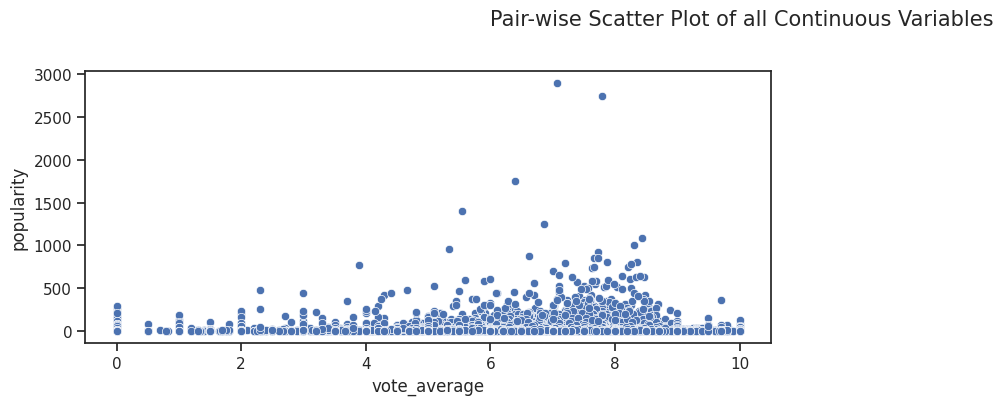

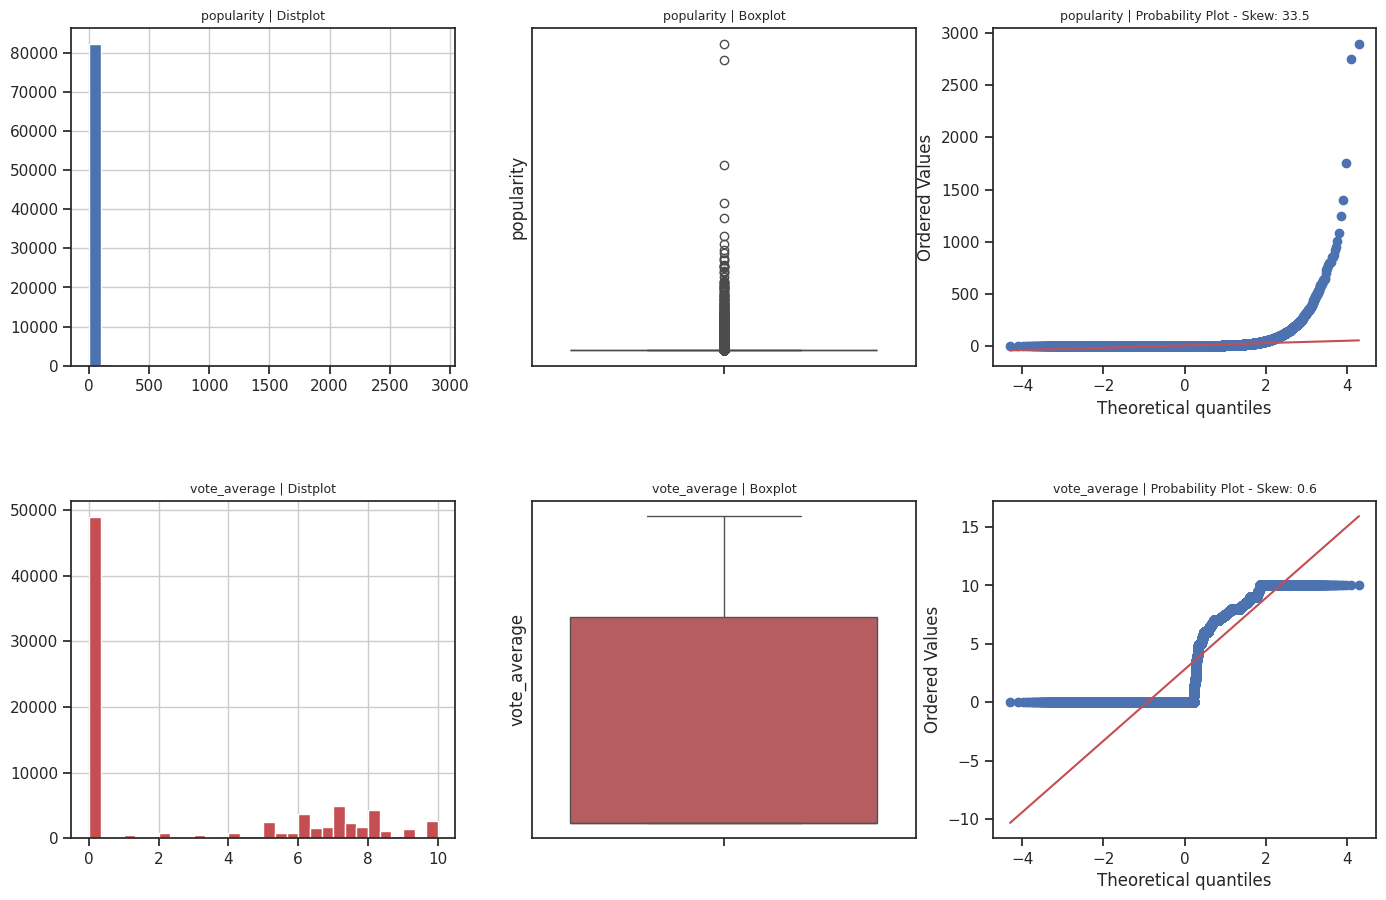

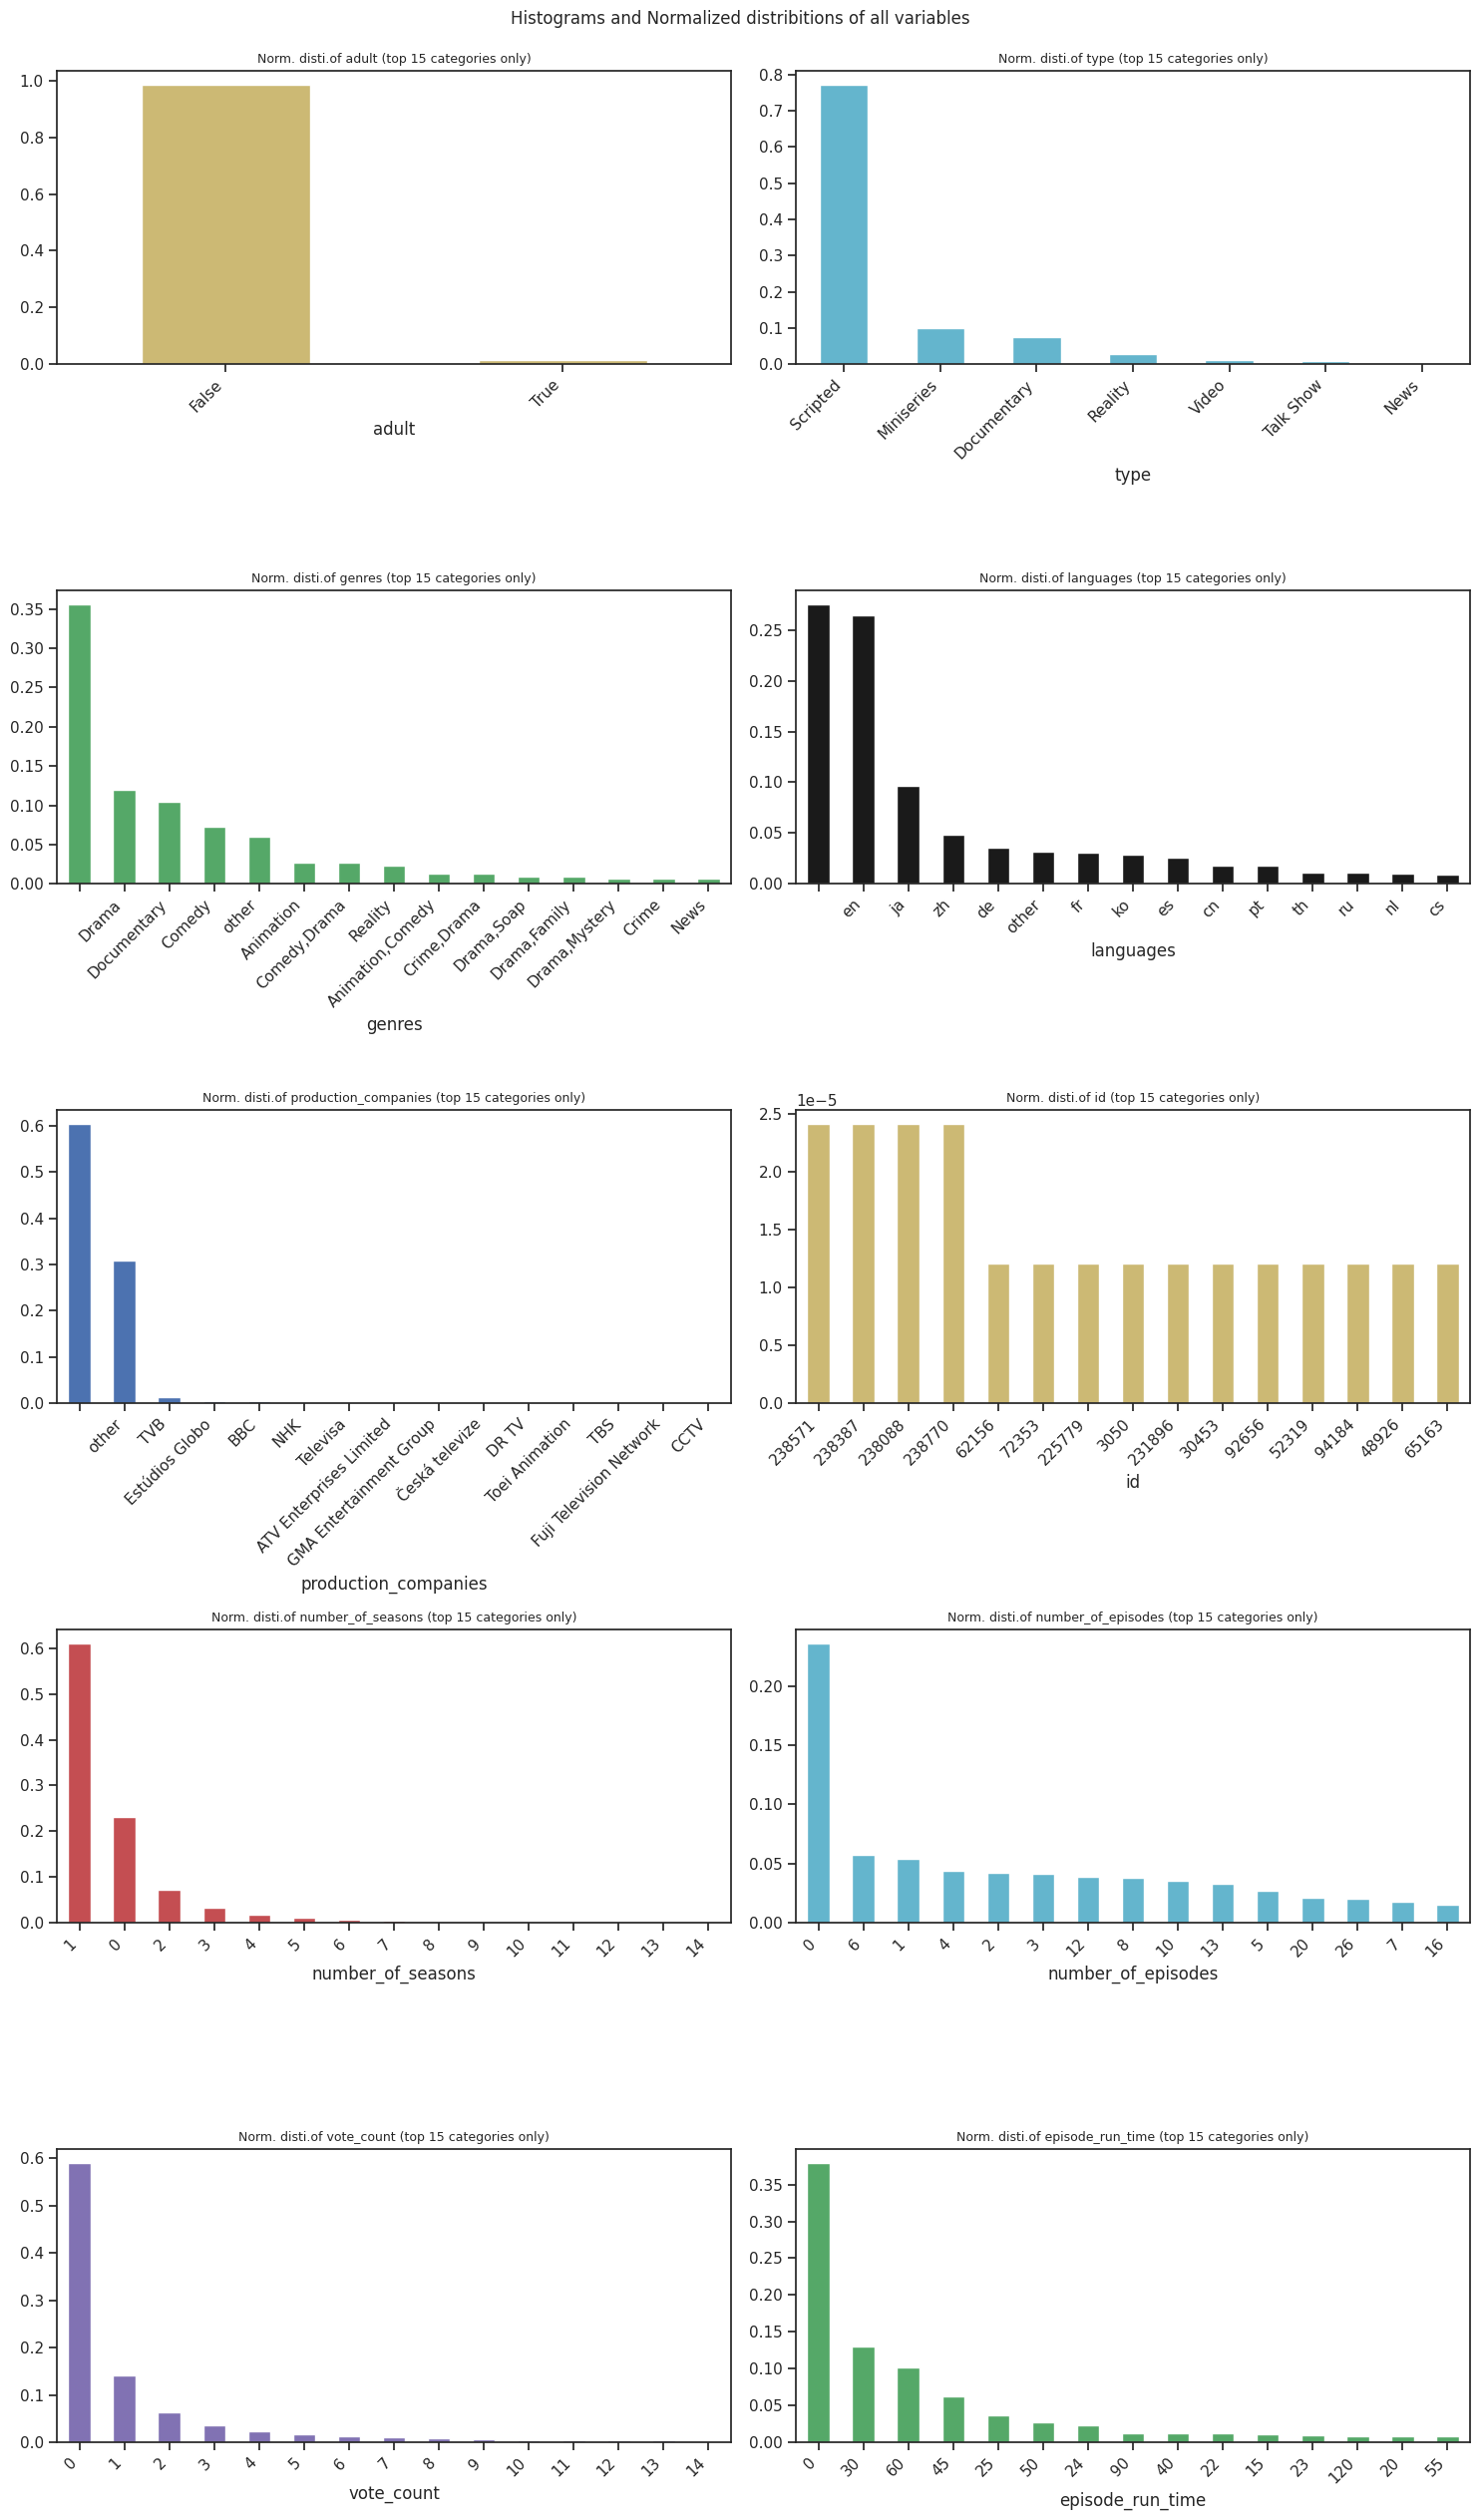

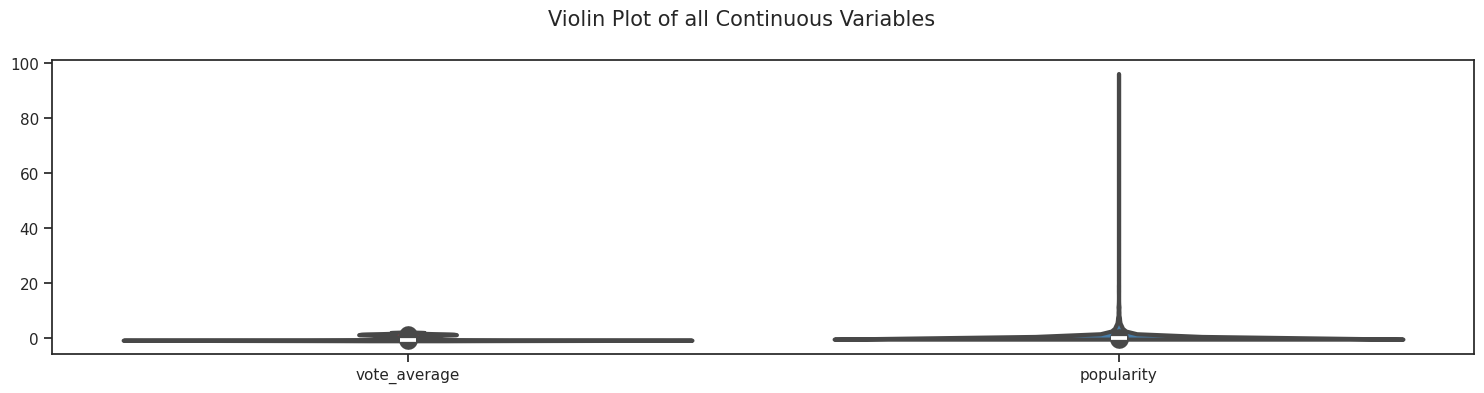

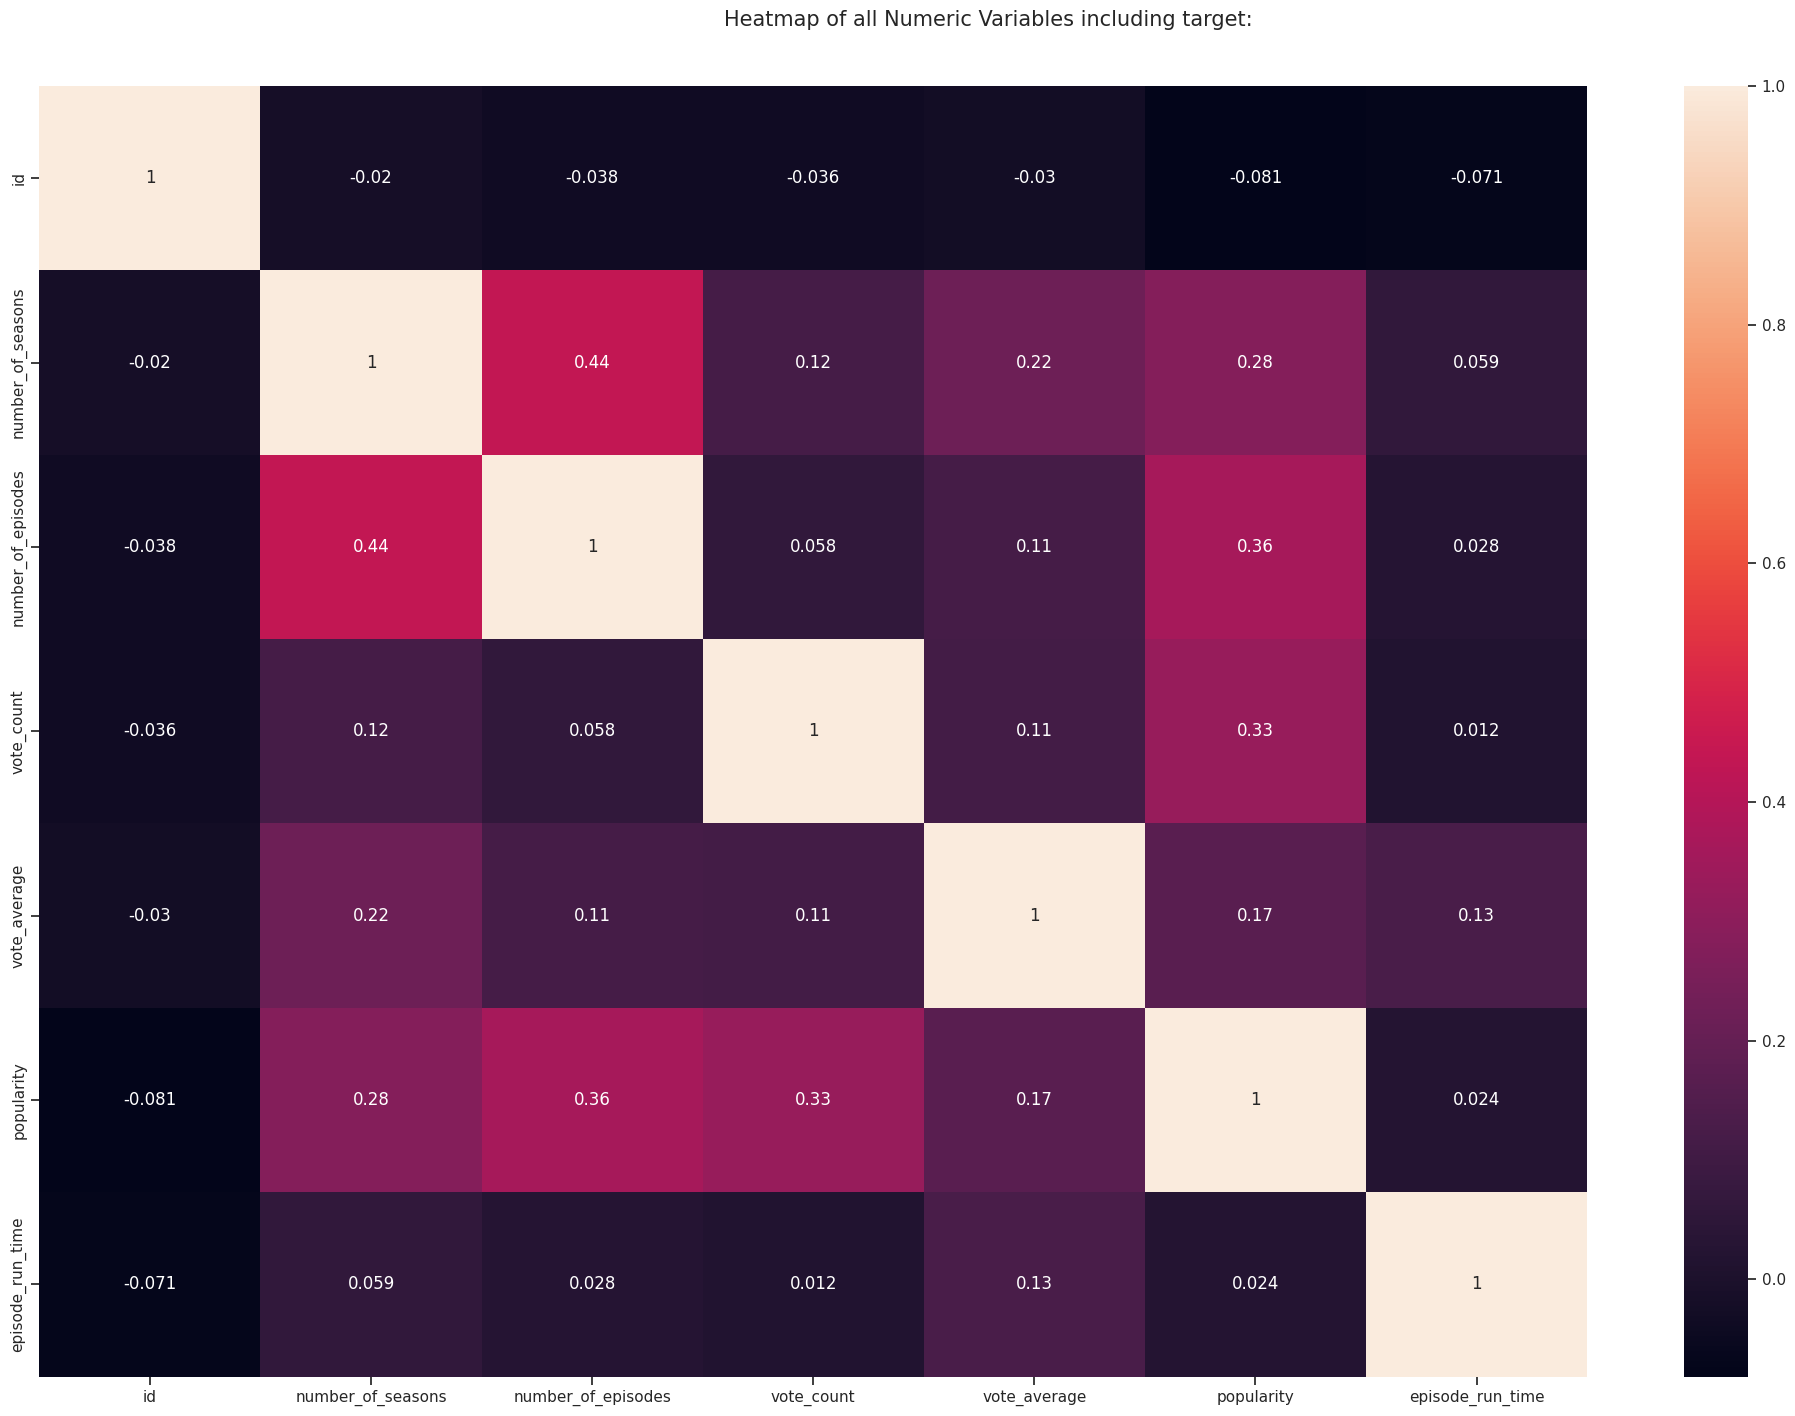

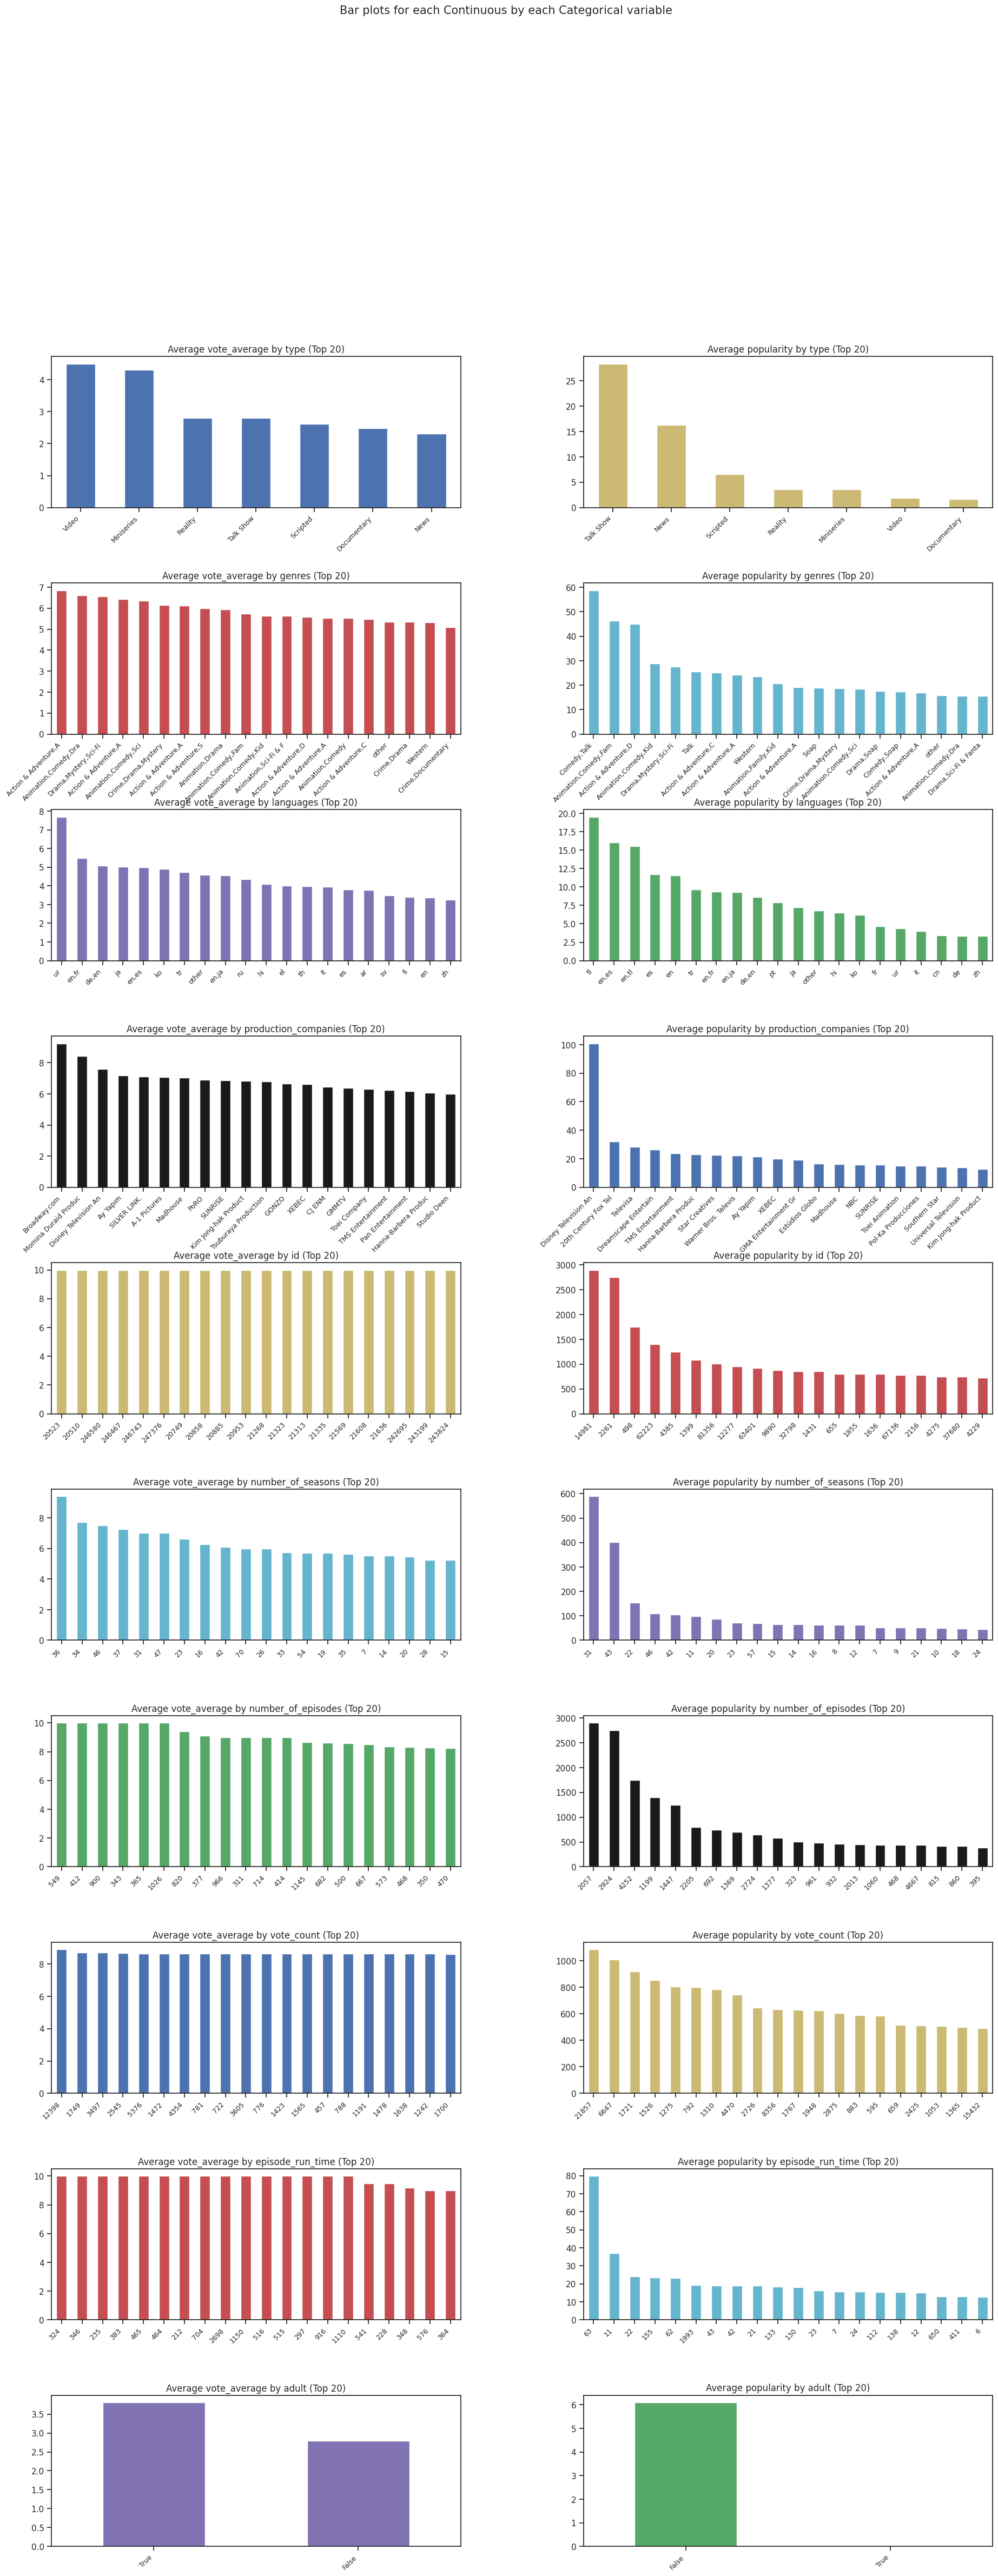

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Could not draw wordcloud plot for name. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for first_air_date. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for last_air_date. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing dat

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time
0,minutes,39280,0,0,0,0.0,False,None,None,0.600,Scripted,None,None,en,None,US,None,30
1,man,222976,1,5,3,7.7,False,2023-05-28,2023-06-25,4.606,Scripted,Drama,Shuichi Okita,ja,WOWOW Prime,JP,None,50
2,erne tur retur,231560,1,10,0,0.0,False,2014-05-15,2014-07-17,0.600,Scripted,None,None,None,None,DK,None,0
3,,34835,1,12,10,6.4,False,2006-10-06,2006-12-22,9.761,Scripted,other,Shotaro Ishinomori,ja,other,JP,other,30
4,bama,42598,0,0,0,0.0,False,None,None,0.600,Scripted,Comedy,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82867,才 初めて産みました セブンティウイザン,198986,1,8,0,0.0,False,2020-04-05,2020-05-24,1.679,Scripted,Family,None,None,NHK,JP,NHK,0
82868,ｎｈｋスペシャル 沸騰都市,215996,1,9,0,0.0,False,2008-05-18,2009-03-29,1.092,Documentary,None,None,ja,NHK,CN,NHK,384
82869,ｎｈｋスペシャル 激流中国,75629,1,14,3,10.0,False,2007-04-01,2008-07-20,1.944,Documentary,Documentary,None,other,NHK,JP,NHK,49
82870,ｒｏｍｅｓ 空港防御システム,158374,1,9,1,6.0,False,2009-10-15,2009-12-10,1.166,Scripted,None,None,ja,other,JP,NHK,0


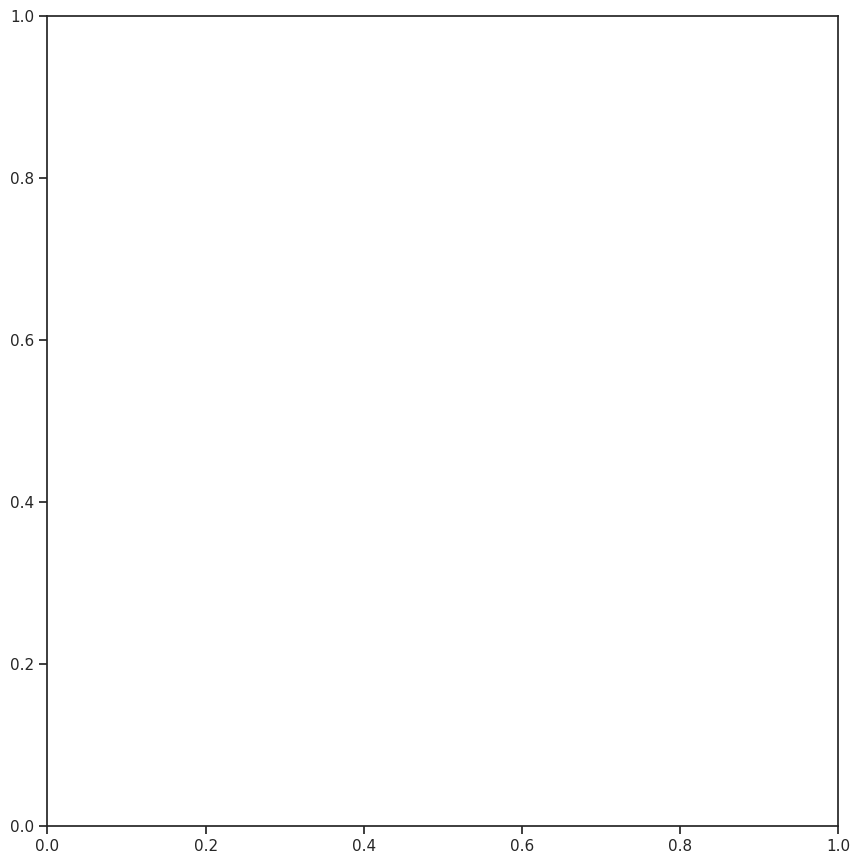

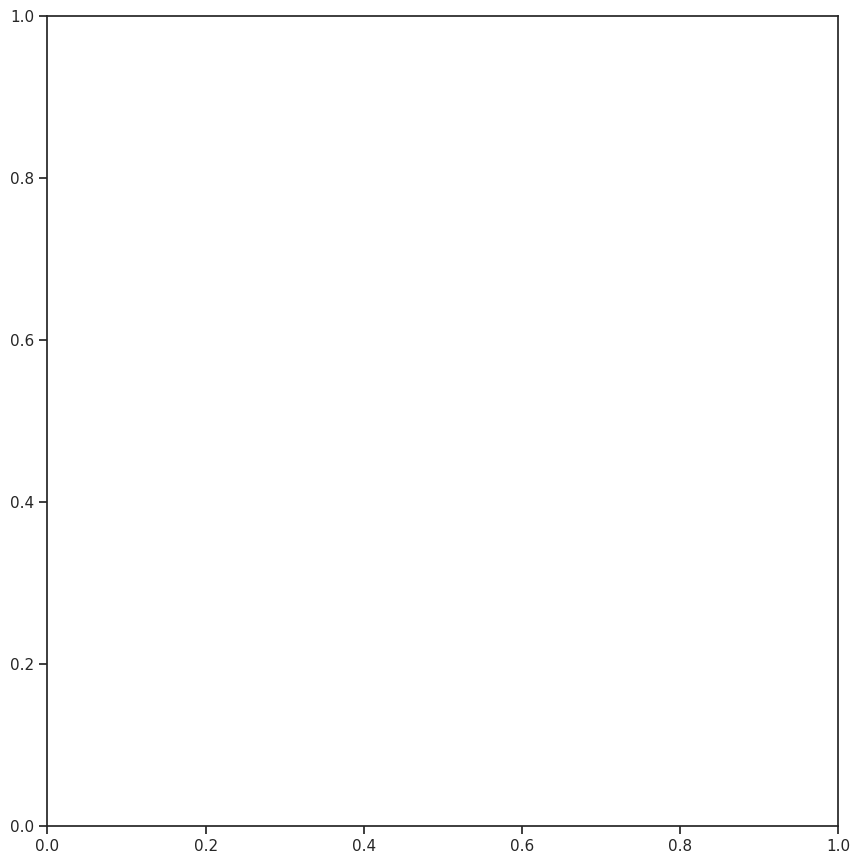

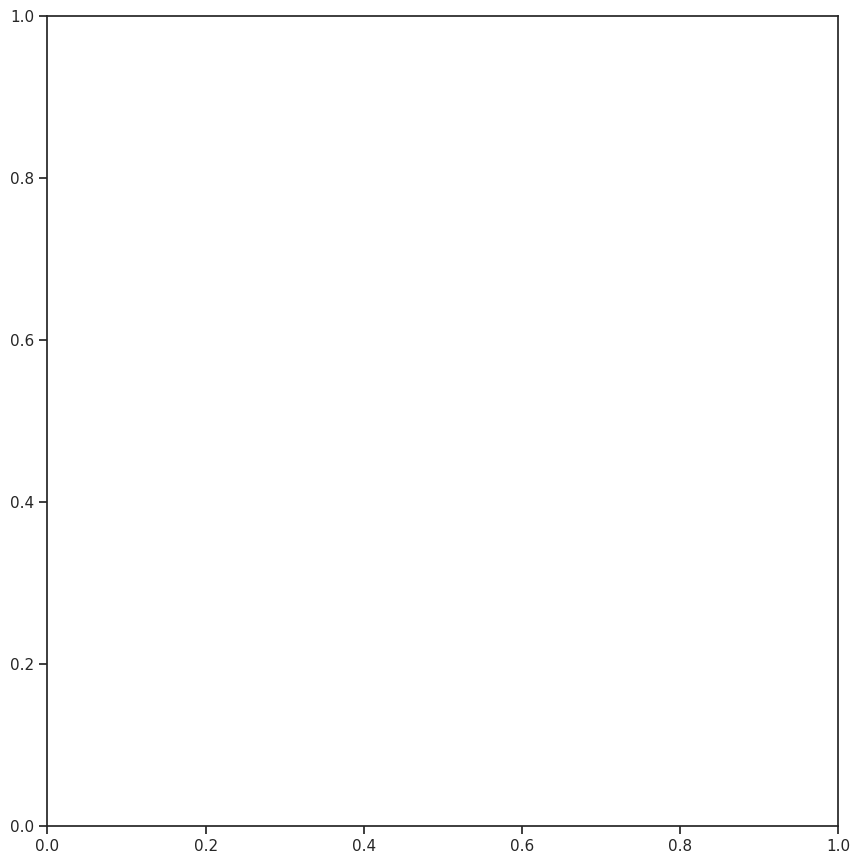

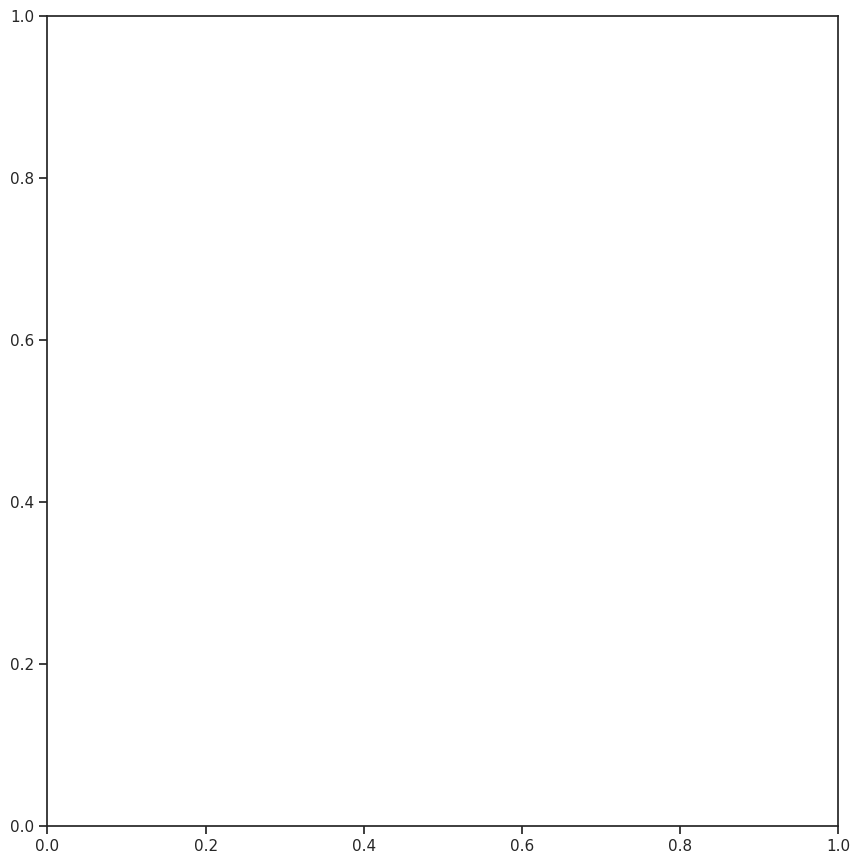

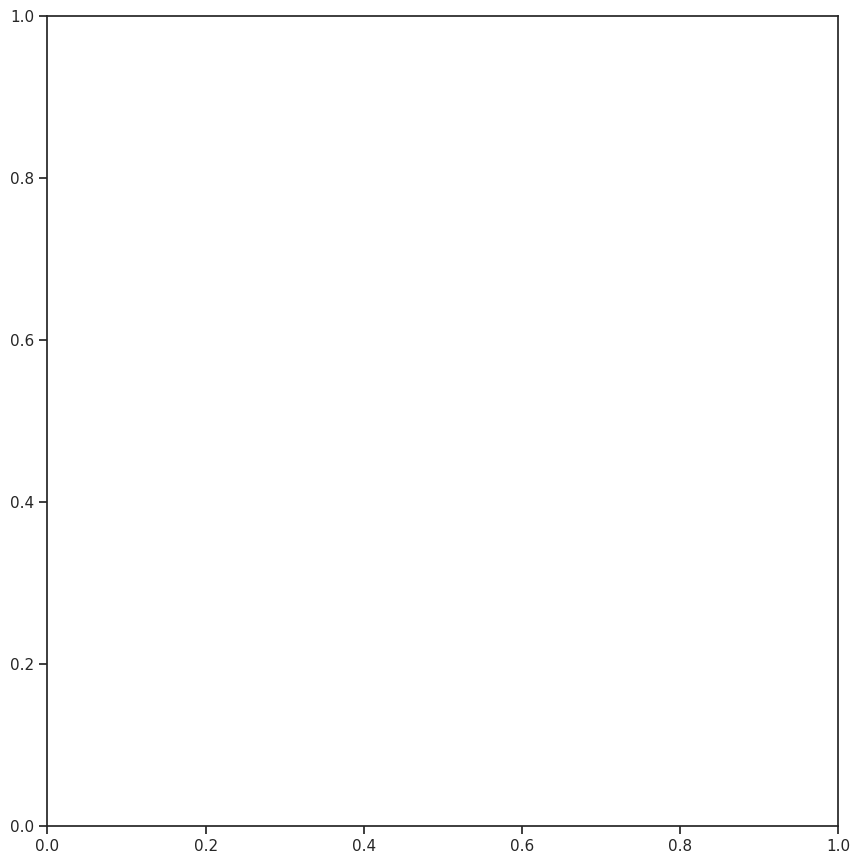

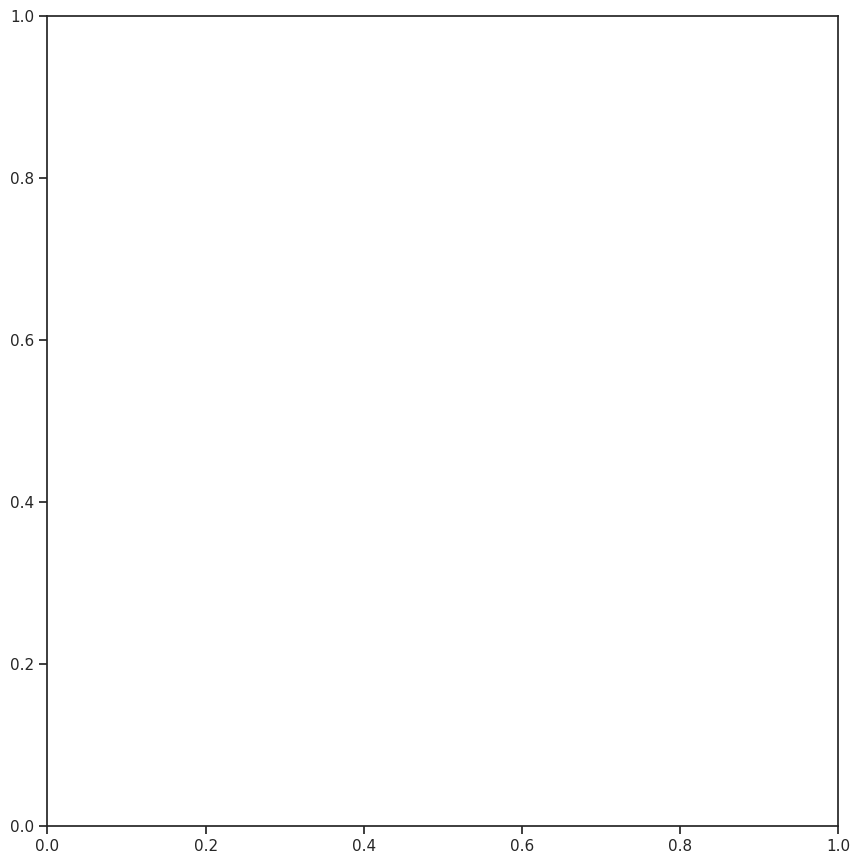

In [7]:
# Autoviz-Automated reports for TMDB

!pip install autoviz

from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline

AV = AutoViz_Class()
AV.AutoViz(tmdb_eda)

# Creating data set of continuese data-Numeric Columns

In [8]:
tmdb_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82872 entries, 0 to 82871
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  82872 non-null  object 
 1   id                    82872 non-null  int64  
 2   number_of_seasons     82872 non-null  int64  
 3   number_of_episodes    82872 non-null  int64  
 4   vote_count            82872 non-null  int64  
 5   vote_average          82872 non-null  float64
 6   adult                 82872 non-null  bool   
 7   first_air_date        62883 non-null  object 
 8   last_air_date         63444 non-null  object 
 9   popularity            82872 non-null  float64
 10  type                  82872 non-null  object 
 11  genres                53402 non-null  object 
 12  created_by            21699 non-null  object 
 13  languages             60084 non-null  object 
 14  networks              54035 non-null  object 
 15  origin_country     

In [9]:
#Continues Numeric Columns
cols= ['id','number_of_seasons','number_of_episodes','vote_count','vote_average','popularity','episode_run_time']
con_df = tmdb_eda[cols]

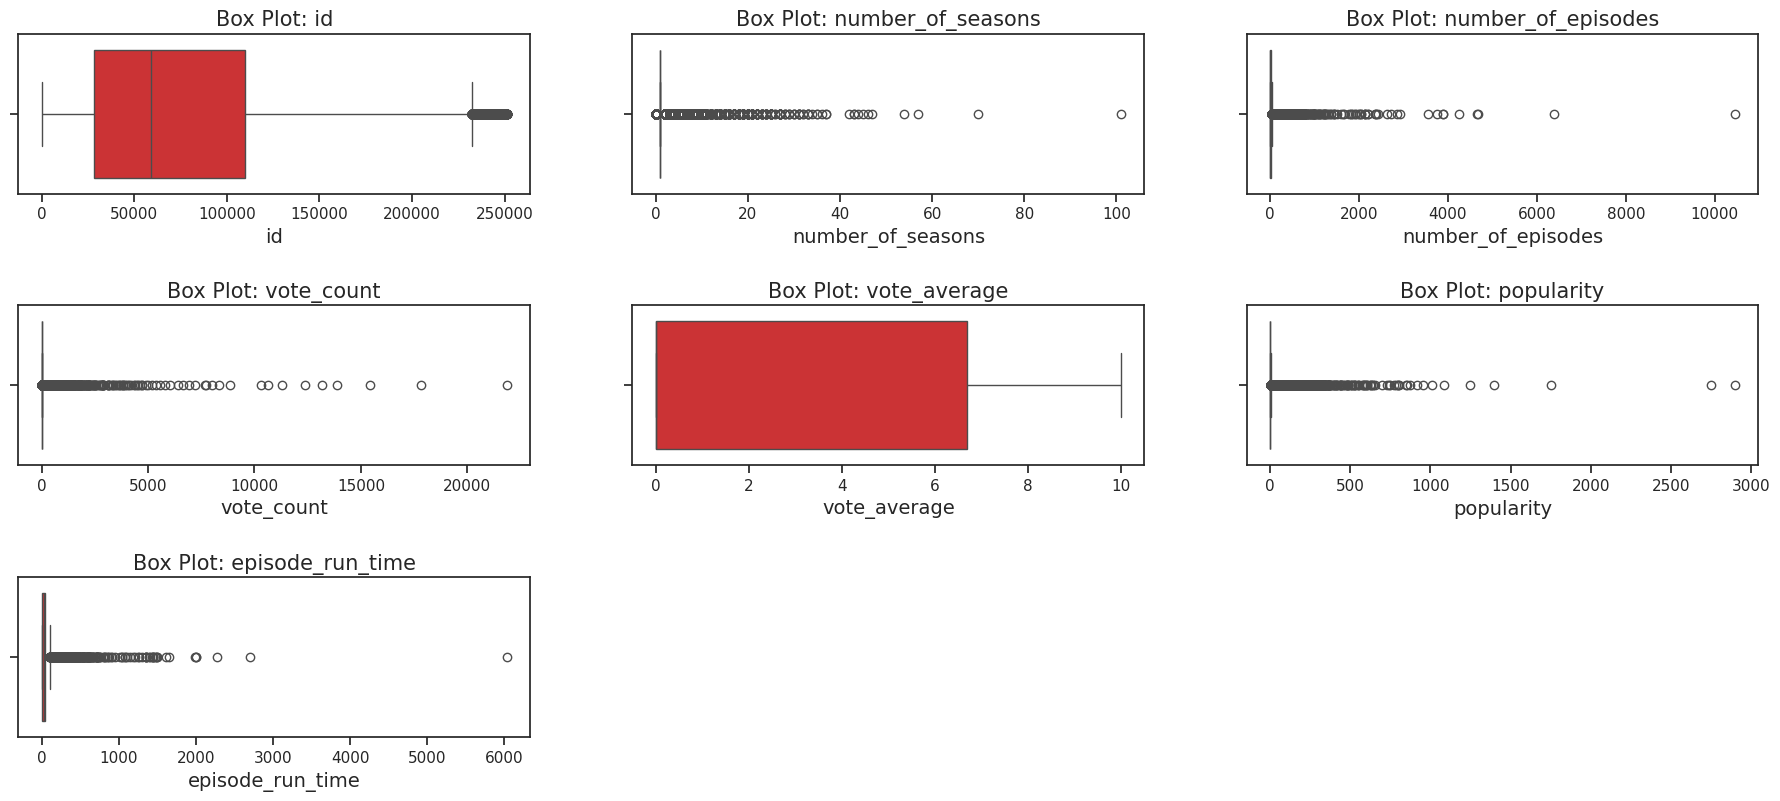

In [10]:
## Using box (Wiskers) plot
plt.figure(figsize=(20,200))

def outliers_boxplot(tmdb_eda):
    for i, col in enumerate(con_df):

            ax = plt.subplot(60, 3, i+1)
            sns.boxplot(data=tmdb_eda, x=col, ax=ax)
            plt.subplots_adjust(hspace = 0.7) # Corrected the typo here
            plt.title('Box Plot: {}'.format(col), fontsize=15)
            plt.xlabel('{}'.format(col), fontsize=14)

outliers_boxplot(con_df)

# Histograms for continues numbers

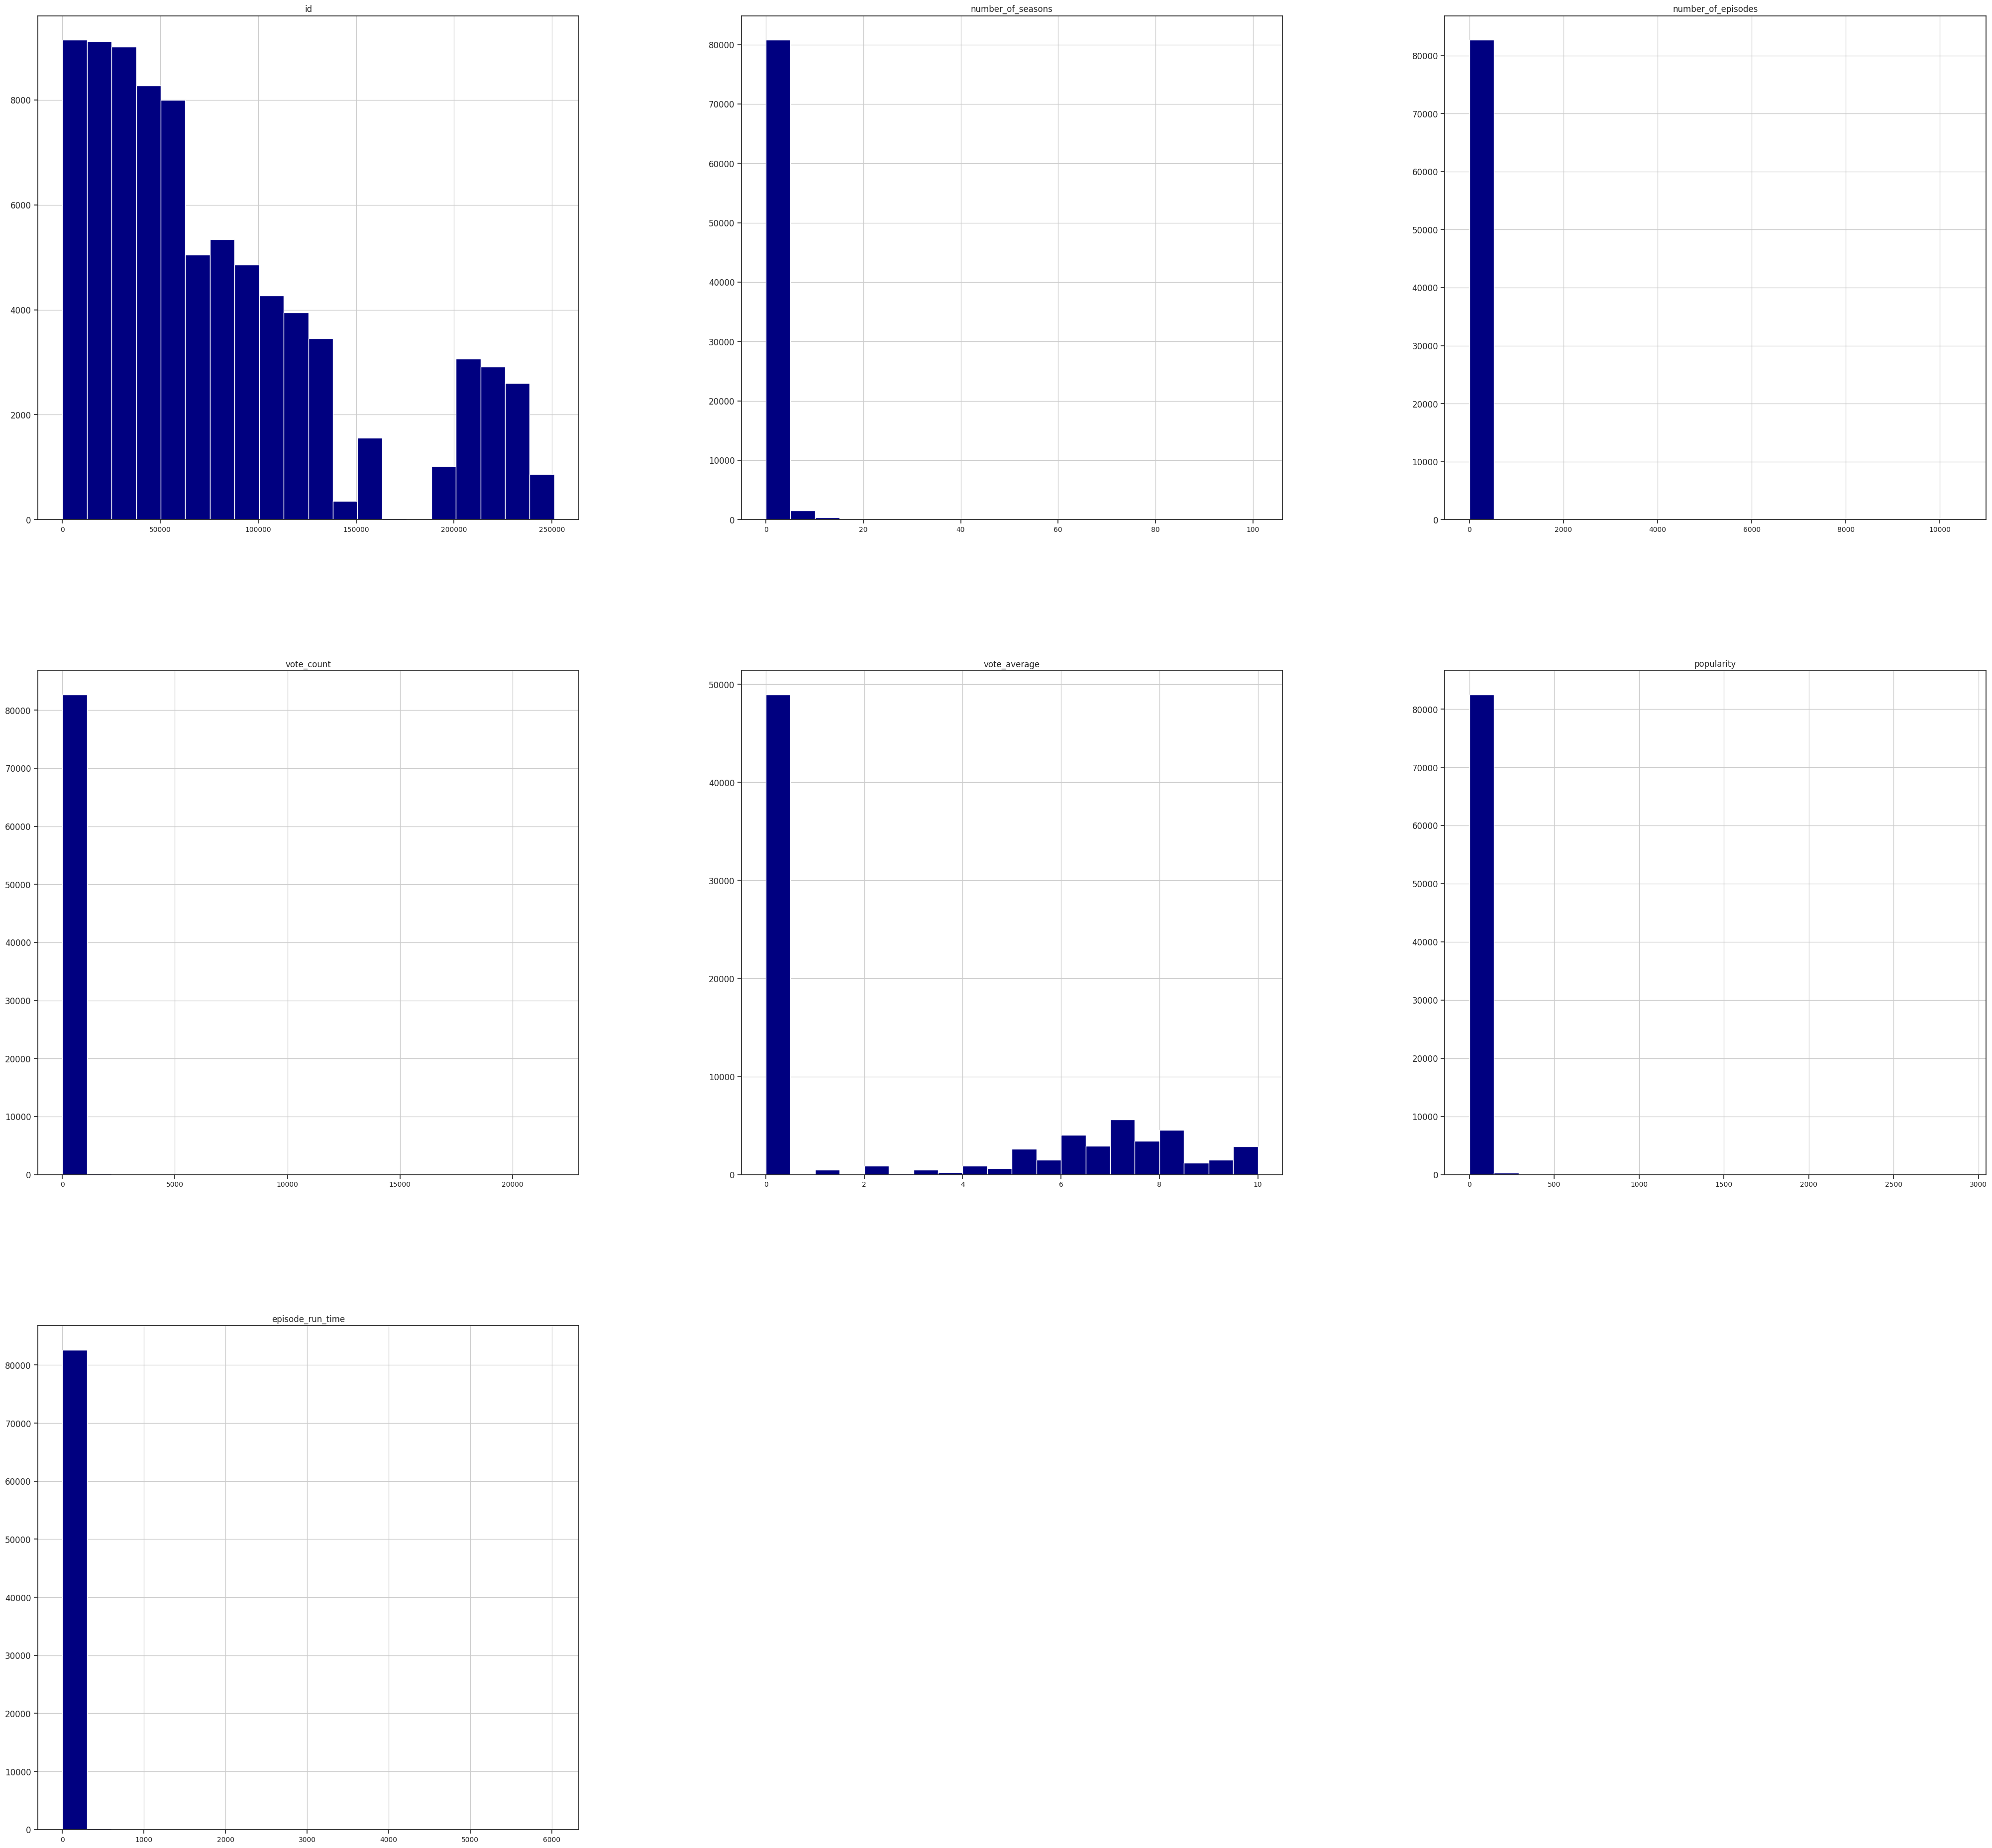

In [11]:
con_df.hist(figsize=(45, 45), bins=20, xlabelsize=10, ylabelsize=12, color = "navy");

# Skewness

In [12]:
def highlight(cell_value):
    highlight = 'background-color: mediumspringgreen;'
    default = ''
    negative = 'background-color: hotpink;'
    if cell_value > 1:
        return highlight
    elif cell_value < -1:
        return negative
    #else
       # return default
pd.DataFrame(con_df.skew(),columns=['skewness']).sort_values(by='skewness', ascending=False).style.applymap(highlight)

,skewness
vote_count,46.677993
number_of_episodes,42.481695
popularity,33.491451
episode_run_time,30.354214
number_of_seasons,9.462167
id,1.044743
vote_average,0.649332


# Correlation and other relationship Analysis:
 between different features to identify multicollinearity and feature importance.

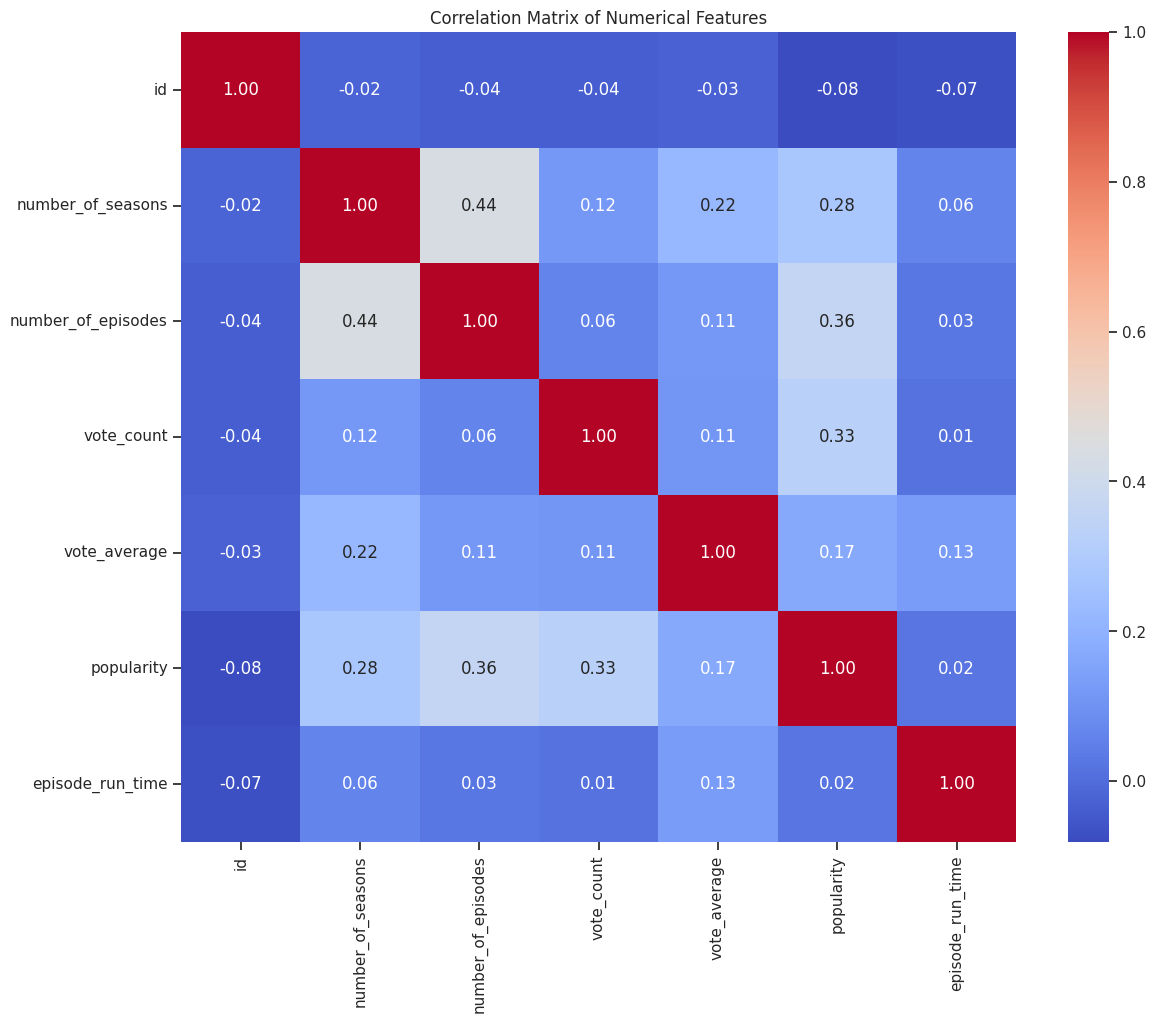

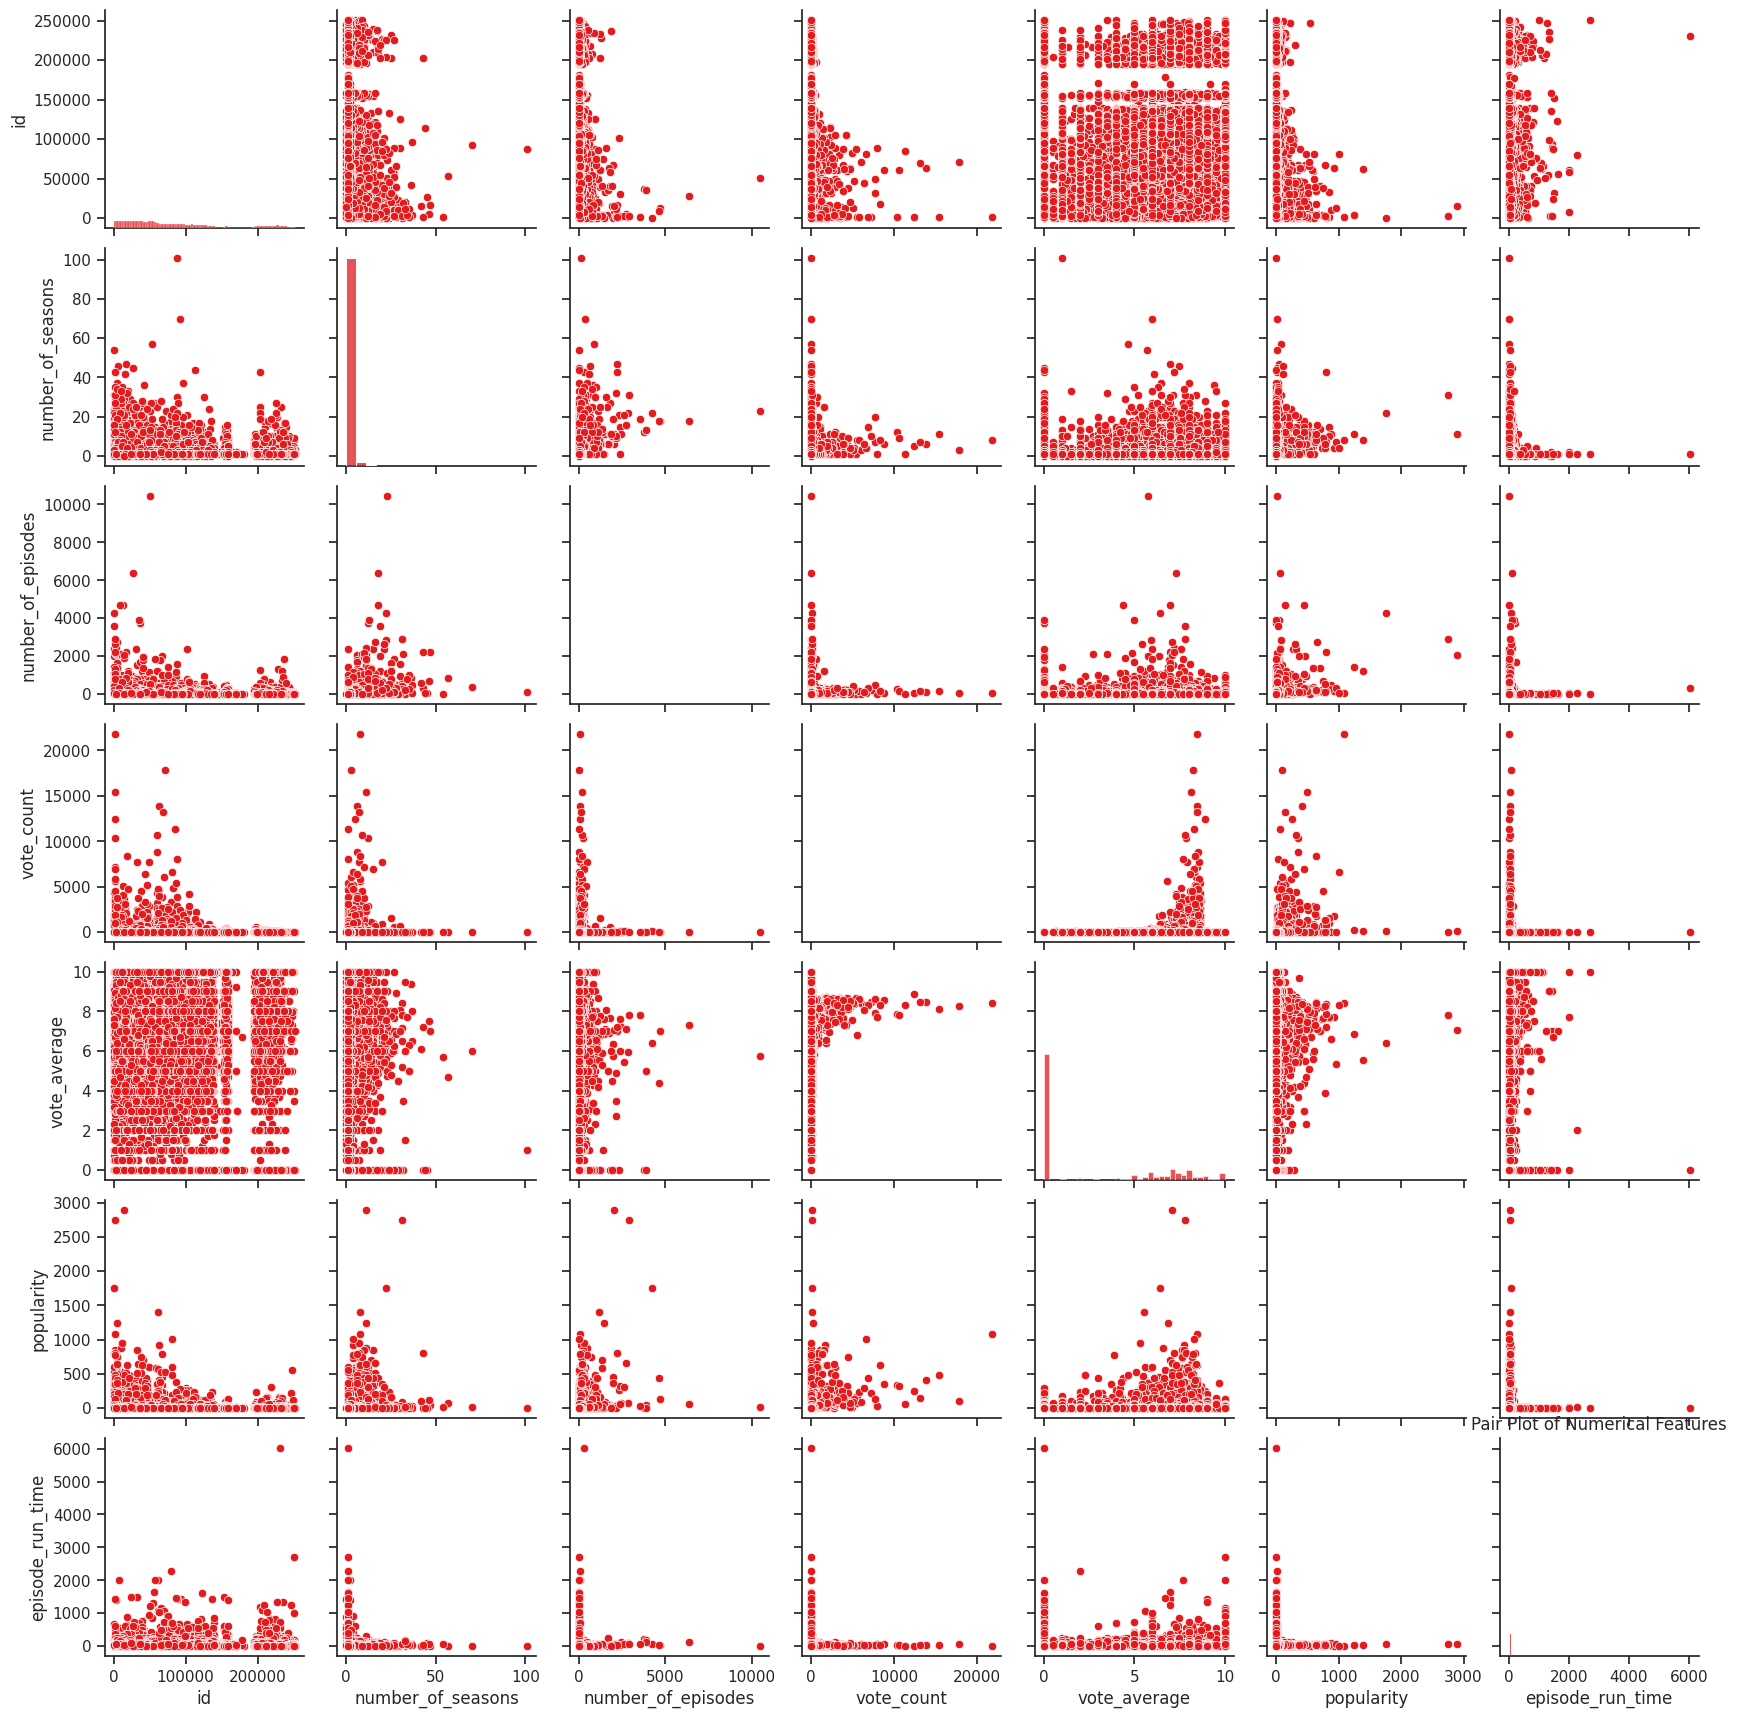

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Using tmdb_eda as DataFrame

# 1. Correlation Matrix and Heatmap:

# Calculate the correlation matrix for numerical features

numerical_features = tmdb_eda.select_dtypes(include=['number']).columns
correlation_matrix = tmdb_eda[numerical_features].corr()

# Plot the heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Pair Plot for Numerical Features:

# Create a pair plot to visualize relationships between numerical features

sns.pairplot(tmdb_eda[numerical_features])
plt.title('Pair Plot of Numerical Features')
plt.show()

# 3. Feature Importance using Random Forest:

# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Select features and target variable
X = tmdb_eda[numerical_features.drop('popularity')]  # Assuming 'popularity' is your target
y = tmdb_eda['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# ANOVA (Analysis of Variance)

statistical test used to compare the means of two or more groups. In the context of the tmdb_eda dataset, it could be used to investigate whether there are significant differences in a numerical variable (like popularity or vote_average) based on different categorical variables (like genres or origin_country).

In [19]:
import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm # Import anova_lm correctly

# Define the model
model = sm.ols('popularity ~ genres', data=tmdb_eda).fit()

# Perform ANOVA
anova_table = anova_lm(model, typ=2) # Call anova_lm without sm.stats
print(anova_table)

             sum_sq       df         F         PR(>F)   
genres    8.912681e+04      1.0  97.978617  4.355984e-23
Residual  7.538317e+07  82870.0        NaN           NaN


# Label Encodindg

Label Encoding is a technique used in machine learning to convert categorical data (data that represents categories or groups) into numerical data. Many machine learning algorithms work best with numerical data, so this conversion is often necessary.


**Unique Categories:**

 It identifies all the unique categories within a categorical feature (column) of your dataset.

**Assigning Numerical Labels**:

It assigns a unique integer (numerical label) to each category. These labels usually start from 0 and increment for each new category.

**Replacing Categories with Labels:**

 It replaces the original category values in the dataset with their corresponding numerical labels.

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Using tmdb_eda is your DataFrame

# Specify the columns to encode
categorical_cols = ['type', 'genres', 'created_by', 'languages', 'networks', 'origin_country', 'production_companies']

# Create a dictionary to store the encoders for each column
encoders = {}

for col in categorical_cols:
    # Get the top 20 most frequent categories
    top_20_categories = tmdb_eda[col].value_counts().index[:20]

    # Add 'other' to the top_20_categories list
    top_20_categories = top_20_categories.tolist() + ['other']

    # Create a label encoder for the current column
    le = LabelEncoder()

    # Fit the encoder on the top 20 categories plus 'other'
    le.fit(top_20_categories)

    # Transform the column, replacing rare categories with 'other'
    tmdb_eda[col] = tmdb_eda[col].apply(lambda x: le.transform([x])[0] if x in top_20_categories else le.transform(['other'])[0])

    # Store the encoder in the dictionary
    encoders[col] = le


# Now tmdb_eda has the label-encoded categorical columns

In [21]:
tmdb_eda.head()

,name,id,number_of_seasons,number_of_episodes,vote_count,vote_average,adult,first_air_date,last_air_date,popularity,type,genres,created_by,languages,networks,origin_country,production_companies,episode_run_time
0,minutes,39280,0,0,0,0.0,False,None,None,0.600,4,11,12,16,10,10,10,30
1,man,222976,1,5,3,7.7,False,2023-05-28,2023-06-25,4.606,4,4,12,2,10,3,10,50
2,erne tur retur,231560,1,10,0,0.0,False,2014-05-15,2014-07-17,0.600,4,11,12,5,10,15,10,0
3,,34835,1,12,10,6.4,False,2006-10-06,2006-12-22,9.761,4,11,7,2,10,3,10,30
4,bama,42598,0,0,0,0.0,False,None,None,0.600,4,15,12,5,10,12,10,0


# EDA - Save tmdb.eda as pickle file to my Google Drive

In [22]:
# Import necessary libraries
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path where you want to save the pickle file in your Google Drive
# Make sure to replace 'your_folder' with the actual folder name in your Google Drive, or create the folder.
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eda.pkl'

# Check if the directory exists, and if not, create it
import os
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Created directory: {directory}")

# Now, let's save the tmdb_NP DataFrame to a pickle file
try:
  with open(file_path, 'wb') as file:
      pickle.dump(tmdb_eda, file)
  print(f"tmdb_eda saved to {file_path}")
except NameError:
  print('Run all the code in the notebook until the Dataframe tmdb_eda is created')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_eda saved to /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eda.pkl


# Import tmdb.eda pickel file from my Google Drive Location

In [23]:
import pickle
from google.colab import drive

# Mount Google Drive (if you haven't already)
drive.mount('/content/drive')

# Define the file path where the pickle file is located in your Google Drive
file_path = '/content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eda.pkl'  # Replace 'your_folder' with the actual folder name

# Load the data from the pickle file
try:
    with open(file_path, 'rb') as file:
        tmdb_eda = pickle.load(file)
    print(f"tmdb_eda loaded from {file_path} successfully.")

    #  use the loaded DataFrame (tmdb_eda)
    #  display the first few rows:
    print(tmdb_eda.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path and ensure the file exists in your Google Drive.")
except Exception as e:
    print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tmdb_eda loaded from /content/drive/My Drive/1pBDwupkA4bAYBLsQilnu8YrNra72QfKz/tmdb_eda.pkl successfully.
        name          id    number_of_seasons  number_of_episodes  vote_count  \
0          minutes   39280          0                   0               0       
1              man  222976          1                   5               3       
2   erne tur retur  231560          1                  10               0       
3                    34835          1                  12              10       
4             bama   42598          0                   0               0       

   vote_average  adult first_air_date last_air_date  popularity  type  genres  \
0       0.0      False         None           None      0.600      4     11     
1       7.7      False   2023-05-28     2023-06-25      4.606      4      4     
2       0.0      False   2014-05-15